# Initial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from pprint import pprint
from IPython.display import Image
from sklearn import svm
from scipy import stats 
import pydotplus

# for inline plots in jupyter
%matplotlib inline 

#removing warning messages CHECK THIS IF SOMETHING BREAKS!!!!!
pd.options.mode.chained_assignment = 'warn'  # default='warn'

data_path = "Marketing_Campaign_final.csv"

df = pd.read_csv(data_path)

Split the data set to X and y.<br>
X for the features and y for the target. 

In [2]:
X = df.drop('Response', axis=1)
del X[X.columns[0]] # removing old indexes in an unnamed column
y = df['Response']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [4]:
X.columns

Index(['Complain', 'Income_min_max', 'Num_of_Children', 'Purchase_bin',
       'Spent_min_max', 'Mnt_Responded', 'Web_Visits_Range', 'Status_cat',
       'Edu_cat', 'Age_bin', 'Registration_bin'],
      dtype='object')

# Decision Tree Classifier

Create Decision Tree classifier object, train it on the train set and predict the labels to the test set.

## Basic

In [5]:
clf = DecisionTreeClassifier(random_state=42) 

# Train Decision Tree Classifer 
clf = clf.fit(X_train,y_train)

# Predict the label
y_pred = clf.predict(X_test)

Acuuracy and confusion matrix:

In [6]:
print(metrics.accuracy_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

0.8381642512077294


0   1
0  319  39
1   28  28

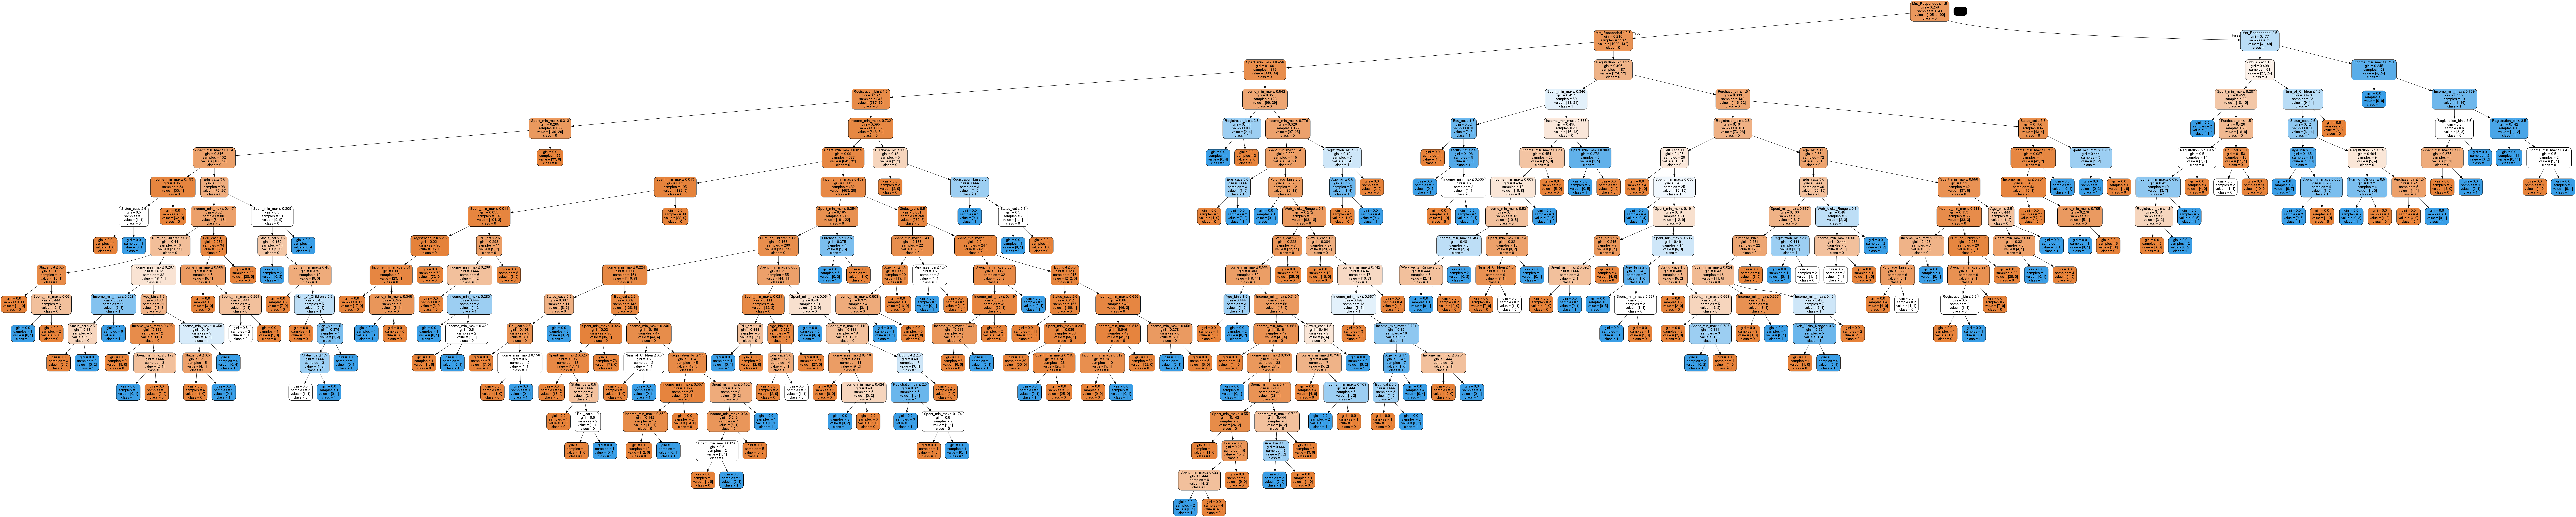

In [7]:
dot = export_graphviz(clf, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('tree1.png')
Image(graph.create_png())

We have Overfitting

In [8]:
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

0.9935535858178888


0    1
0  1051    0
1     8  182

## Solving overfitting with smaller trees

In [9]:
clf_dec = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8,
                              min_samples_split=15, min_samples_leaf=5, random_state=42) 

clf_dec = clf_dec.fit(X_train,y_train)

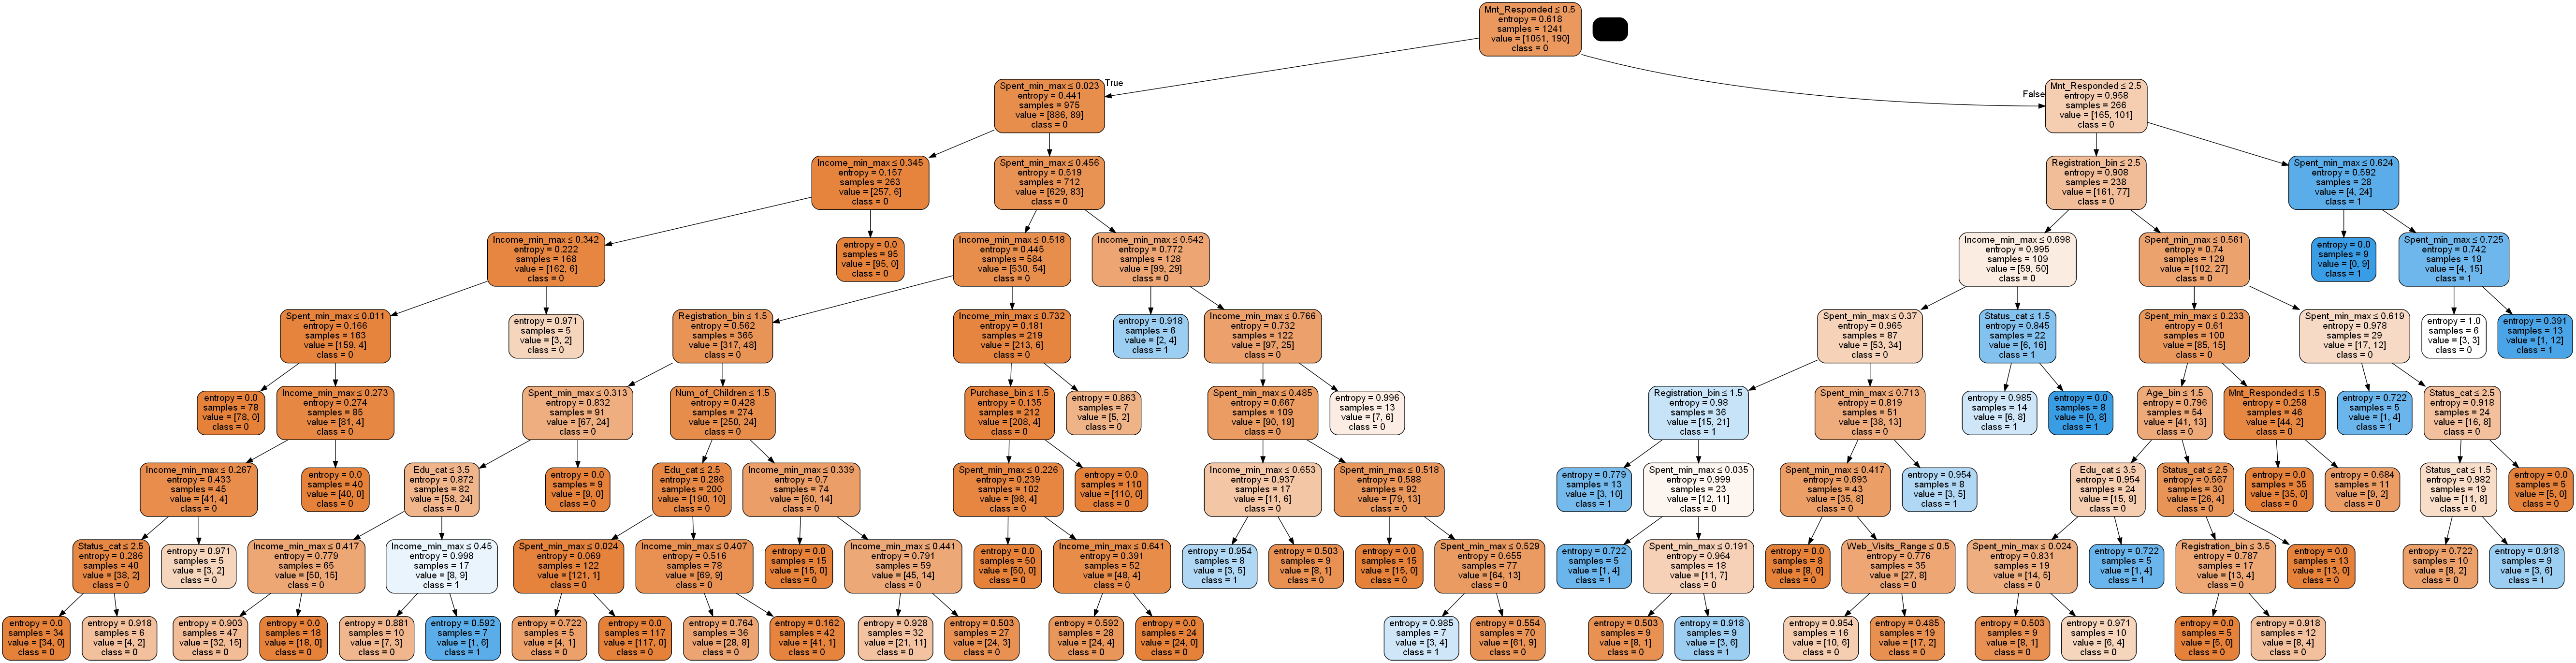

In [10]:
dot = export_graphviz(clf_dec, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('tree2.png')
Image(graph.create_png())

In [11]:
y_train_pred_dec = clf_dec.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred_dec))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred_dec))

0.8984689766317486


0   1
0  1020  31
1    95  95

In [12]:
y_pred_dec = clf_dec.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_dec))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_dec))

0.855072463768116


0   1
0  331  27
1   33  23

Showing effect of tree depth

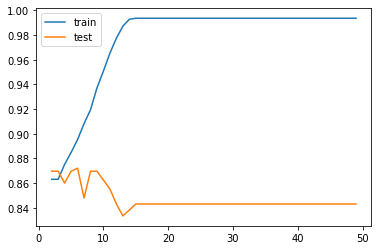

In [13]:
train_scores, test_scores = [],[]
for k in range(2,50):
    clf3 = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                              max_depth=k, random_state=42) 
    clf3.fit(X_train,y_train)
    train_scores.append(clf3.score(X_train, y_train))
    test_scores.append(clf3.score(X_test, y_test))
plt.plot(range(2,50), train_scores)
plt.plot(range(2,50), test_scores)
plt.legend(['train','test'])
plt.show()

## ROC curve

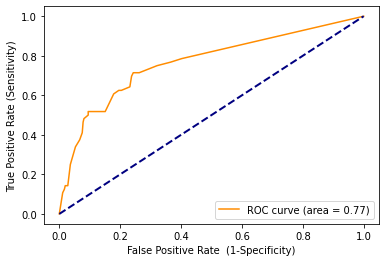

In [14]:
y_probs_dec = clf_dec.predict_proba(X_test) # probability prediction
fpr_dec, tpr_dec, threshold = metrics.roc_curve(y_test, y_probs_dec[:,1])
auc_dec = metrics.auc(fpr_dec, tpr_dec)
plt.figure()
plt.plot(fpr_dec, tpr_dec, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_dec)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

# SVM classifier

In [15]:
clf_svm = svm.SVC(kernel='rbf', C=0.9, probability=True,random_state=42)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

     0  1
0  354  4
1   47  9
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       358
           1       0.69      0.16      0.26        56

    accuracy                           0.88       414
   macro avg       0.79      0.57      0.60       414
weighted avg       0.86      0.88      0.84       414



### ROC curve

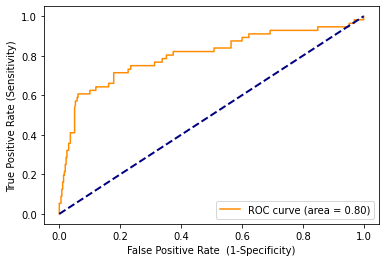

In [16]:
y_probs_svm = clf_svm.predict_proba(X_test) # probability prediction
fpr_svm, tpr_svm, threshold = metrics.roc_curve(y_test, y_probs_svm[:,1])
auc_svm = metrics.auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes classifier 

In [17]:
clf_NBayes = GaussianNB()
clf_NBayes.fit(X_train, y_train)
y_pred = clf_NBayes.predict(X_test)
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

0   1
0  332  26
1   33  23

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       358
           1       0.47      0.41      0.44        56

    accuracy                           0.86       414
   macro avg       0.69      0.67      0.68       414
weighted avg       0.85      0.86      0.85       414



In [18]:
clf_NBayes.fit(X_train, y_train)
nb_y_pred = clf_NBayes.predict(X_test)
nb_accuracy = metrics.accuracy_score(y_test, nb_y_pred)
print('base model accuracy = {:0.2f}%'.format(nb_accuracy*100))

base model accuracy = 85.75%


## roc curve

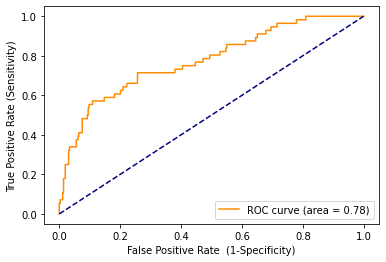

In [19]:
y_probs_NBayes = clf_NBayes.predict_proba(X_test) # probability prediction
fpr_NBayes, tpr_NBayes, _ = metrics.roc_curve(y_test, y_probs_NBayes[:,1])
auc_NBayes = metrics.auc(fpr_NBayes, tpr_NBayes)
plt.figure()
plt.plot(fpr_NBayes, tpr_NBayes, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_NBayes)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

# Random Forest classifier

In [20]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

0   1
0  346  12
1   36  20

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       358
           1       0.62      0.36      0.45        56

    accuracy                           0.88       414
   macro avg       0.77      0.66      0.69       414
weighted avg       0.87      0.88      0.87       414



## ROC curve

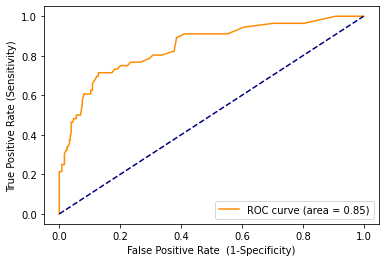

In [21]:
y_probs_rf = rf.predict_proba(X_test) # probability prediction
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_probs_rf[:,1])
auc_rf = metrics.auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting Classifier

## Stats

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
clf_GBoost = GradientBoostingClassifier(random_state=42)
clf_GBoost.fit(X_train, y_train)
y_pred = clf_GBoost.predict(X_test)
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

0   1
0  343  15
1   31  25

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       358
           1       0.62      0.45      0.52        56

    accuracy                           0.89       414
   macro avg       0.77      0.70      0.73       414
weighted avg       0.88      0.89      0.88       414



In [24]:
y_train_pred = clf_GBoost.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

0.9145850120870266


0   1
0  1046   5
1   101  89

In [25]:
y_pred = clf_GBoost.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

0.8888888888888888


0   1
0  343  15
1   31  25

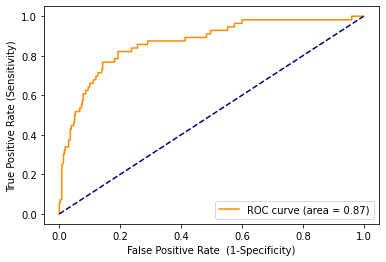

In [26]:
y_probs_boost = clf_GBoost.predict_proba(X_test) # probability prediction
fpr_boost, tpr_boost, _ = metrics.roc_curve(y_test, y_probs_boost[:,1])
auc_boost = metrics.auc(fpr_boost, tpr_boost)
plt.figure()
plt.plot(fpr_boost, tpr_boost, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_boost)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

# Comparison Classifiers

### Roc

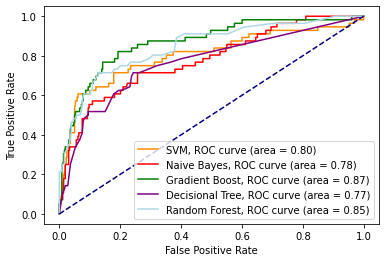

In [27]:
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', label='SVM, ROC curve (area = %0.2f)' %  auc_svm)
plt.plot(fpr_NBayes, tpr_NBayes, color='red', label='Naive Bayes, ROC curve (area = %0.2f)' %  auc_NBayes)
plt.plot(fpr_boost, tpr_boost, color='green', label='Gradient Boost, ROC curve (area = %0.2f)' %  auc_boost)
plt.plot(fpr_dec, tpr_dec, color='purple', label='Decisional Tree, ROC curve (area = %0.2f)' %  auc_dec)
plt.plot(fpr_rf, tpr_rf, color='lightblue', label='Random Forest, ROC curve (area = %0.2f)' %  auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Cross Validation

In [28]:
X = X.to_numpy()

In [29]:
clf_list = [clf_GBoost,clf_NBayes,clf_svm,clf_dec,rf]
cm_dict, auc_dict = {}, {}
kf = KFold(n_splits=10, shuffle=True, random_state=42) #for cross validation
k = 0
for train_index, test_index in kf.split(X):
    k+=1
    print("------",k,"------")
    # split to train and test
    X_trainc, X_testc = X[train_index], X[test_index]
    y_trainc, y_testc = y[train_index], y[test_index]
    for clf in clf_list:
        # train the model and make a prediction
        clf.fit(X_trainc,y_trainc)
        y_pred = clf.predict(X_testc)
        cm = metrics.confusion_matrix(y_testc, y_pred)
        y_probs = clf.predict_proba(X_testc) # probability prediction
        fpr, tpr, _ = metrics.roc_curve(y_testc, y_probs[:,1])
        auc = metrics.auc(fpr, tpr)
        # save the results
        cm_list = cm_dict.get(clf,[])
        cm_list.append(cm)
        cm_dict[clf] = cm_list
        auc_list = auc_dict.get(clf,[])
        auc_list.append(auc)
        auc_dict[clf] = auc_list
        # print the results
        print("Classifier: ", clf)
        print("Accuracy: ", metrics.accuracy_score(y_testc, y_pred))

------ 1 ------
Classifier:  GradientBoostingClassifier(random_state=42)
Accuracy:  0.9096385542168675
Classifier:  GaussianNB()
Accuracy:  0.8674698795180723
Classifier:  SVC(C=0.9, probability=True, random_state=42)
Accuracy:  0.891566265060241
Classifier:  DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=15, random_state=42)
Accuracy:  0.891566265060241
Classifier:  RandomForestClassifier(random_state=42)
Accuracy:  0.891566265060241
------ 2 ------
Classifier:  GradientBoostingClassifier(random_state=42)
Accuracy:  0.8674698795180723
Classifier:  GaussianNB()
Accuracy:  0.8674698795180723
Classifier:  SVC(C=0.9, probability=True, random_state=42)
Accuracy:  0.8734939759036144
Classifier:  DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=15, random_state=42)
Accuracy:  0.8554216867469879
Classifier:  RandomForestClassifier(random_state=42)
Accurac

### avg

In [30]:
acc_dict = {}
recall_dict = {}
for clf in clf_list:
    print(clf)
    acc = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_dict[clf]]
    acc_dict[clf] = acc 
    print("mean accuracy: ", np.mean(acc))
    recall = [(cm[1][1])/(cm[1][1]+cm[1][0]) for cm in cm_dict[clf]]
    recall_dict[clf] = recall
    print("mean recall: ", np.mean(recall))
    print("mean AUC: ", np.mean(auc_dict[clf]))

GradientBoostingClassifier(random_state=42)
mean accuracy:  0.8742971887550202
mean recall:  0.3108619206279205
mean AUC:  0.8310480423280839
GaussianNB()
mean accuracy:  0.7786454910551296
mean recall:  0.5129132652449623
mean AUC:  0.7553952800092516
SVC(C=0.9, probability=True, random_state=42)
mean accuracy:  0.8688864549105514
mean recall:  0.18915137591043696
mean AUC:  0.7656776358990701
DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=15, random_state=42)
mean accuracy:  0.8453048557867835
mean recall:  0.2849710367850915
mean AUC:  0.720305656391347
RandomForestClassifier(random_state=42)
mean accuracy:  0.8694742606790798
mean recall:  0.3082533648286213
mean AUC:  0.8279930303695953


### Null Hypothesis

checking if gradient boost is the same as random forest

In [31]:
ttest,pval = stats.ttest_rel(acc_dict[clf_GBoost], acc_dict[rf])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.16848418550263514
accept null hypothesis


In [32]:
ttest,pval = stats.ttest_rel(recall_dict[clf_GBoost], recall_dict[rf])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.9251687563829327
accept null hypothesis


In [33]:
ttest,pval = stats.ttest_rel(auc_dict[clf_GBoost], auc_dict[rf])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.718022280161758
accept null hypothesis


accept on all three therefor they're close. Numbers for Gradient boost are slightly higher so we'll say it's better

# Hyperparameter Tuning

## Random Search

### Random Forest

In [34]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [35]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 15)]

max_features = ['auto', 'log2', 2, 5, 7]

max_depth = [int(x) for x in range(2, 8)]
max_depth.append(None)

min_samples_split = [2, 5, 10, 15, 20]

min_samples_leaf = [1, 3, 5, 10, 15]

max_samples = [0.1, 0.3, 0.5, 0.7]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_samples': max_samples}

In [36]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, None],
                                        'max_features': ['auto', 'log2', 2, 5,
                                                         7],
                                        'max_samples': [0.1, 0.3, 0.5, 0.7],
                                        'min_samples_leaf': [1, 3, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [10, 80, 151, 222, 292,
                                                         363, 434, 504, 575,
                                                         646, 717, 787, 858,
                                                         929, 1000]},
                   random_state=42, verbose=2)

In [37]:
rf_random.best_params_

{'n_estimators': 787,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_samples': 0.5,
 'max_features': 5,
 'max_depth': 7}

In [38]:
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
print('base model accuracy = {:0.2f}%'.format(rf_accuracy*100))

best_random_rf = rf_random.best_estimator_
random_y_pred = best_random_rf.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - rf_accuracy) / rf_accuracy))

base model accuracy = 88.41%
random model accuracy = 87.20%
Improvement of -1.37%.


#### depth comparisson

In [39]:
random_depth = [best_random_rf.estimators_[i].get_depth() for i in range(best_random_rf.get_params()['n_estimators'])]
print('Random max depth: ', max(random_depth))
print('Random min depth: ', min(random_depth))

Random max depth:  7
Random min depth:  6


In [40]:
rf_depth = [rf.estimators_[i].get_depth() for i in range(rf.get_params()['n_estimators'])]
print('Base max depth: ', max(rf_depth))
print('Base min depth: ', min(rf_depth))

Base max depth:  21
Base min depth:  13


#### ROC Curve

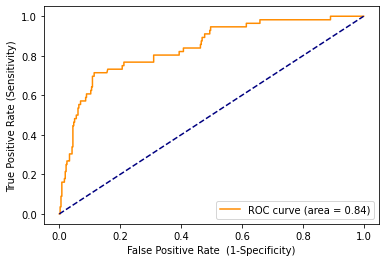

In [41]:
y_probs_random_rf = best_random_rf.predict_proba(X_test) # probability prediction
fpr_random_rf, tpr_random_rf, _ = metrics.roc_curve(y_test, y_probs_random_rf[:,1])
auc_random_rf = metrics.auc(fpr_random_rf, tpr_random_rf)
plt.figure()
plt.plot(fpr_random_rf, tpr_random_rf, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_random_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes

In [42]:
clf_NBayes.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [43]:
var_smoothing = np.linspace(0,0.001,100)
nb_grid = {'var_smoothing':var_smoothing}

In [44]:
nb_random = RandomizedSearchCV(estimator = clf_NBayes, param_distributions = nb_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)

nb_random.fit(X_train, y_train)
nb_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.0009696969696969698}

In [45]:
clf_NBayes.fit(X_train, y_train)
nb_y_pred = clf_NBayes.predict(X_test)
nb_accuracy = metrics.accuracy_score(y_test, nb_y_pred)
print('base model accuracy = {:0.2f}%'.format(nb_accuracy*100))

best_random_nb = nb_random.best_estimator_
best_random_nb.fit(X_train, y_train )
random_y_pred = best_random_nb.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - nb_accuracy) / nb_accuracy))

base model accuracy = 85.75%
random model accuracy = 85.99%
Improvement of 0.28%.


#### ROC Curve

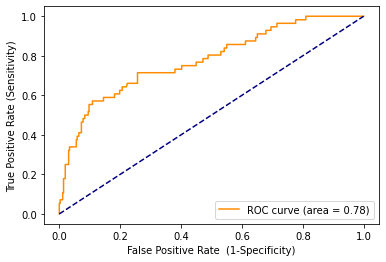

In [46]:
y_probs_random_nb = best_random_nb.predict_proba(X_test) # probability prediction
fpr_random_nb, tpr_random_nb, _ = metrics.roc_curve(y_test, y_probs_random_nb[:,1])
auc_random_nb = metrics.auc(fpr_random_nb, tpr_random_nb)
plt.figure()
plt.plot(fpr_random_nb, tpr_random_nb, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_random_nb)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation

In [47]:
clf_list = [best_random_nb,clf_NBayes]
cm_dict, auc_dict = {}, {}
kf = KFold(n_splits=10, shuffle=True, random_state=42) #for cross validation
k = 0
for train_index, test_index in kf.split(X):
    k+=1
    print("------",k,"------")
    # split to train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for clf in clf_list:
        # train the model and make a prediction
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        cm = metrics.confusion_matrix(y_test, y_pred)
        y_probs = clf.predict_proba(X_test) # probability prediction
        fpr, tpr, _ = metrics.roc_curve(y_test, y_probs[:,1])
        auc = metrics.auc(fpr, tpr)
        # save the results
        cm_list = cm_dict.get(clf,[])
        cm_list.append(cm)
        cm_dict[clf] = cm_list
        auc_list = auc_dict.get(clf,[])
        auc_list.append(auc)
        auc_dict[clf] = auc_list
        # print the results
        print("Classifier: ", clf)
        print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

------ 1 ------
Classifier:  GaussianNB(var_smoothing=0.0009696969696969698)
Accuracy:  0.8674698795180723
Classifier:  GaussianNB()
Accuracy:  0.8674698795180723
------ 2 ------
Classifier:  GaussianNB(var_smoothing=0.0009696969696969698)
Accuracy:  0.8554216867469879
Classifier:  GaussianNB()
Accuracy:  0.8674698795180723
------ 3 ------
Classifier:  GaussianNB(var_smoothing=0.0009696969696969698)
Accuracy:  0.8554216867469879
Classifier:  GaussianNB()
Accuracy:  0.8493975903614458
------ 4 ------
Classifier:  GaussianNB(var_smoothing=0.0009696969696969698)
Accuracy:  0.8373493975903614
Classifier:  GaussianNB()
Accuracy:  0.8253012048192772
------ 5 ------
Classifier:  GaussianNB(var_smoothing=0.0009696969696969698)
Accuracy:  0.8192771084337349
Classifier:  GaussianNB()
Accuracy:  0.8253012048192772
------ 6 ------
Classifier:  GaussianNB(var_smoothing=0.0009696969696969698)
Accuracy:  0.8242424242424242
Classifier:  GaussianNB()
Accuracy:  0.8121212121212121
------ 7 ------
Classi

#### avg

In [48]:
acc_dict = {}
recall_dict = {}
for clf in clf_list:
    print(clf)
    acc = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_dict[clf]]
    acc_dict[clf] = acc 
    print("mean accuracy: ", np.mean(acc))
    recall = [(cm[1][1])/(cm[1][1]+cm[1][0]) for cm in cm_dict[clf]]
    recall_dict[clf] = recall
    print("mean recall: ", np.mean(recall))
    print("mean AUC: ", np.mean(auc_dict[clf]))

GaussianNB(var_smoothing=0.0009696969696969698)
mean accuracy:  0.8416757940854325
mean recall:  0.44267966152239424
mean AUC:  0.7562156973666454
GaussianNB()
mean accuracy:  0.7786454910551296
mean recall:  0.5129132652449623
mean AUC:  0.7553952800092516


### SVM

In [49]:
clf_svm.get_params()

{'C': 0.9,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [238]:
gamma = ['scale','auto']
C = np.linspace(0.1,1000,100)
tol = np.linspace(0.00005,0.002,100)
svm_grid = {'C': C,
            'gamma': gamma,
            'tol':tol}

In [239]:
svm_random = RandomizedSearchCV(estimator = clf_svm, param_distributions = svm_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)

svm_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=SVC(C=0.9, probability=True, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.000e-01, 1.020e+01, 2.030e+01, 3.040e+01, 4.050e+01, 5.060e+01,
       6.070e+01, 7.080e+01, 8.090e+01, 9.100e+01, 1.011e+02, 1.112e+02,
       1.213e+02, 1.314e+02, 1.415e+02, 1.516e+02, 1.617e+02, 1.718e+02,
       1.819e+02, 1.920e+02, 2.021e+02, 2.122e+02...
       1.54696970e-03, 1.56666667e-03, 1.58636364e-03, 1.60606061e-03,
       1.62575758e-03, 1.64545455e-03, 1.66515152e-03, 1.68484848e-03,
       1.70454545e-03, 1.72424242e-03, 1.74393939e-03, 1.76363636e-03,
       1.78333333e-03, 1.80303030e-03, 1.82272727e-03, 1.84242424e-03,
       1.86212121e-03, 1.88181818e-03, 1.90151515e-03, 1.92121212e-03,
       1.94090909e-03, 1.96060606e-03, 1.98030303e-03, 2.00000000e-03])},
                   random_state=42, verbose=2)

In [240]:
svm_random.best_params_

{'tol': 0.0018424242424242424, 'gamma': 'auto', 'C': 10.2}

In [241]:
clf_svm.fit(X_train, y_train)
svm_y_pred = clf_svm.predict(X_test)
svm_accuracy = metrics.accuracy_score(y_test, svm_y_pred)
print('base model accuracy = {:0.2f}%'.format(svm_accuracy*100))

best_random_svm = svm_random.best_estimator_
random_y_pred = best_random_svm.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - svm_accuracy) / svm_accuracy))

base model accuracy = 85.45%
random model accuracy = 84.85%
Improvement of -0.71%.


#### ROC Curve

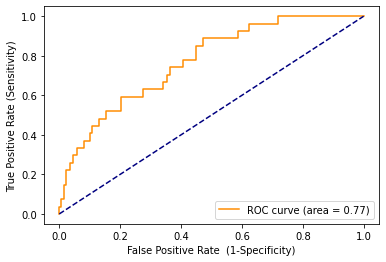

In [54]:
y_probs_random_svm = best_random_svm.predict_proba(X_test) # probability prediction
fpr_random_svm, tpr_random_svm, _ = metrics.roc_curve(y_test, y_probs_random_svm[:,1])
auc_random_svm = metrics.auc(fpr_random_svm, tpr_random_svm)
plt.figure()
plt.plot(fpr_random_svm, tpr_random_svm, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_random_svm)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [55]:
clf_dec.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [56]:
max_depth = [3,5,7,10]
max_depth.append(None)
min_samples_leaf = [0.1,0.3,0.5,1]
splitter = ['best', 'random']
min_samples_split = [10,13,15,17,20]
dec_grid = {'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'splitter':splitter,
            'min_samples_split':min_samples_split}

In [57]:
dec_random = RandomizedSearchCV(estimator = clf_dec, param_distributions = dec_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)

dec_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=8,
                                                    min_samples_leaf=5,
                                                    min_samples_split=15,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [0.1, 0.3, 0.5, 1],
                                        'min_samples_split': [10, 13, 15, 17,
                                                              20],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [58]:
clf_dec.fit(X_train, y_train)
dec_y_pred = clf_dec.predict(X_test)
dec_accuracy = metrics.accuracy_score(y_test, dec_y_pred)
print('base model accuracy = {:0.2f}%'.format(dec_accuracy*100))

best_random_dec = dec_random.best_estimator_
random_y_pred = best_random_dec.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - dec_accuracy) / dec_accuracy))

base model accuracy = 79.39%
random model accuracy = 87.27%
Improvement of 9.92%.


#### ROC Curve

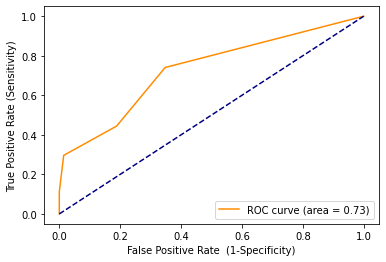

In [59]:
y_probs_random_dec = best_random_dec.predict_proba(X_test) # probability prediction
fpr_random_dec, tpr_random_dec, _ = metrics.roc_curve(y_test, y_probs_random_dec[:,1])
auc_random_dec = metrics.auc(fpr_random_dec, tpr_random_dec)
plt.figure()
plt.plot(fpr_random_dec, tpr_random_dec, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_random_dec)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

### Gradient Boost

In [60]:
clf_GBoost.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [61]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 20)]
learning_rate = [0.1,0.3,0.5,0.7]
subsample = [0.3,0.5,0.7,1]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 3, 5, 10, 15]
max_depth = [int(x) for x in range(2, 8)]
max_depth.append(None)
max_features = ['auto', 'sqrt', 'log2', 2, 5, 7]
gboost_grid = {'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'n_estimators':n_estimators,
            'subsample':subsample,
            'max_features':max_features,
            'learning_rate':learning_rate,
            'min_samples_split':min_samples_split}

In [62]:
gboost_random = RandomizedSearchCV(estimator = clf_GBoost, param_distributions = gboost_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)

gboost_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.3, 0.5, 0.7],
                                        'max_depth': [2, 3, 4, 5, 6, 7, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         2, 5, 7],
                                        'min_samples_leaf': [1, 3, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
                                                         857, 905, 952, 1000],
                         

In [63]:
gboost_random.best_params_

{'subsample': 1,
 'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 2,
 'max_depth': 2,
 'learning_rate': 0.5}

In [64]:
clf_GBoost.fit(X_train, y_train)
gboost_y_pred = clf_GBoost.predict(X_test)
gboost_accuracy = metrics.accuracy_score(y_test, gboost_y_pred)
print('base model accuracy = {:0.2f}%'.format(gboost_accuracy*100))

best_random_boost = gboost_random.best_estimator_
random_y_pred = best_random_boost.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - gboost_accuracy) / gboost_accuracy))

base model accuracy = 85.45%
random model accuracy = 83.03%
Improvement of -2.84%.


#### ROC Curve

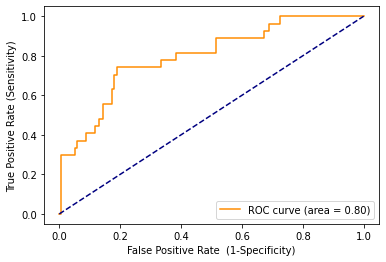

In [65]:
y_probs_random_boost = best_random_boost.predict_proba(X_test) # probability prediction
fpr_random_boost, tpr_random_boost, _ = metrics.roc_curve(y_test, y_probs_random_boost[:,1])
auc_random_boost = metrics.auc(fpr_random_boost, tpr_random_boost)
plt.figure()
plt.plot(fpr_random_boost, tpr_random_boost, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_random_boost)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

## Grid search


### Random Forest

In [66]:
rf_random.best_params_

{'n_estimators': 787,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_samples': 0.5,
 'max_features': 5,
 'max_depth': 7}

In [67]:
n_estimators = [int(x) for x in np.linspace(start = 420, stop = 450, num = 5)]

max_features = ['log2', 2]

max_depth = [int(x) for x in range(5, 7)]
max_depth.append(None)

min_samples_split = [10, 15]

min_samples_leaf = [1, 3]

max_samples = [0.1, 0.3]

rf_grid = {'n_estimators': n_estimators,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': max_features,
              'max_depth': max_depth,
              'max_samples': max_samples}

In [68]:
grid_search = GridSearchCV(estimator = rf, param_grid = rf_grid, cv = 5, n_jobs = -1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


{'max_depth': 6,
 'max_features': 'log2',
 'max_samples': 0.3,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 442}

In [69]:
best_grid_rf = grid_search.best_estimator_
best_grid_rf.fit(X_train, y_train)
grid_y_pred = best_grid_rf.predict(X_test)
grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - rf_accuracy) / rf_accuracy))

grid model accuracy = 86.06%
Improvement of -2.65%.


#### ROC Curve

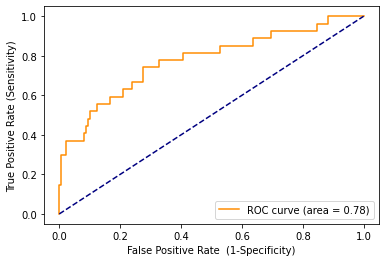

In [70]:
y_probs_grid_rf = best_grid_rf.predict_proba(X_test) # probability prediction
fpr_grid_rf, tpr_grid_rf, _ = metrics.roc_curve(y_test, y_probs_grid_rf[:,1])
auc_grid_rf = metrics.auc(fpr_grid_rf, tpr_grid_rf)
plt.figure()
plt.plot(fpr_grid_rf, tpr_grid_rf, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_grid_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes

In [71]:
nb_random.best_params_

{'var_smoothing': 0.0009696969696969698}

In [72]:
nb_grid = {'var_smoothing':[1,2,-3,-4.0]}
grid_search = GridSearchCV(estimator = clf_NBayes, param_grid = nb_grid, cv = 5, n_jobs = -1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'var_smoothing': 1}

In [73]:
best_grid_nb = grid_search.best_estimator_
best_grid_nb.fit(X_train, y_train)
grid_y_pred = best_grid_nb.predict(X_test)
grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - nb_accuracy) / nb_accuracy))

grid model accuracy = 84.85%
Improvement of -1.05%.


#### ROC Curve

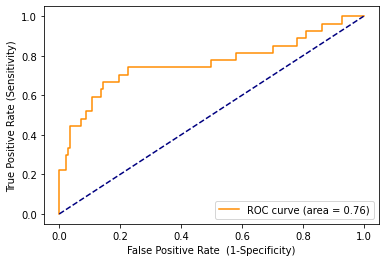

In [74]:
y_probs_grid_nb = best_grid_nb.predict_proba(X_test) # probability prediction
fpr_grid_nb, tpr_grid_nb, _ = metrics.roc_curve(y_test, y_probs_grid_nb[:,1])
auc_grid_nb = metrics.auc(fpr_grid_nb, tpr_grid_nb)
plt.figure()
plt.plot(fpr_grid_nb, tpr_grid_nb, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_grid_nb)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

### SVM

In [75]:
svm_random.best_params_

{'gamma': 0.6468181818181818, 'C': 0.1}

In [76]:
gamma = [0.9,0.91,0.93,0.95]
C = [530,535,540,545]
svm_grid = {'gamma':gamma,
            'C':C
}

In [77]:
grid_search = GridSearchCV(estimator = clf_svm, param_grid = svm_grid, cv = 5, n_jobs = -1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'C': 530, 'gamma': 0.95}

In [78]:
best_grid_svm = grid_search.best_estimator_
best_grid_svm.fit(X_train, y_train)
grid_y_pred = best_grid_svm.predict(X_test)
grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - svm_accuracy) / svm_accuracy))

grid model accuracy = 80.00%
Improvement of -6.38%.


#### ROC Curve

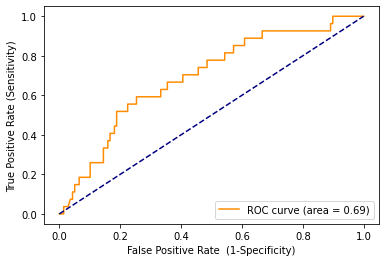

In [79]:
y_probs_grid_svm = best_grid_svm.predict_proba(X_test) # probability prediction
fpr_grid_svm, tpr_grid_svm, _ = metrics.roc_curve(y_test, y_probs_grid_svm[:,1])
auc_grid_svm = metrics.auc(fpr_grid_svm, tpr_grid_svm)
plt.figure()
plt.plot(fpr_grid_svm, tpr_grid_svm, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_grid_svm)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [80]:
max_depth = [3,5,7,10]
max_depth.append(None)
min_samples_leaf = [0.1,0.3,0.5]
splitter = ['best', 'random']
min_samples_split = [10,13,15,17,20]
dec_grid = {'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'splitter':splitter,
            'min_samples_split':min_samples_split}

In [81]:
grid_search = GridSearchCV(estimator = clf_dec, param_grid = dec_grid, cv = 5, n_jobs = -1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


{'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 10,
 'splitter': 'best'}

In [82]:
best_grid_dec = grid_search.best_estimator_
best_grid_dec.fit(X_train, y_train)
grid_y_pred = best_grid_dec.predict(X_test)
grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - dec_accuracy) / dec_accuracy))

grid model accuracy = 83.64%
Improvement of 5.34%.


#### ROC Curve

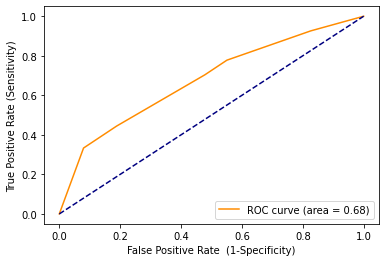

In [83]:
y_probs_grid_dec = best_grid_dec.predict_proba(X_test) # probability prediction
fpr_grid_dec, tpr_grid_dec, _ = metrics.roc_curve(y_test, y_probs_grid_dec[:,1])
auc_grid_dec = metrics.auc(fpr_grid_dec, tpr_grid_dec)
plt.figure()
plt.plot(fpr_grid_dec, tpr_grid_dec, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_grid_dec)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

### Gradient Boost

In [84]:
gboost_random.best_params_

{'subsample': 1,
 'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 2,
 'max_depth': 2,
 'learning_rate': 0.5}

In [85]:
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 550, num = 3)]
learning_rate = [0.1,0.3]
subsample = [0.3,0.5,0.7]
min_samples_split = [10, 15, 20]
min_samples_leaf = [5, 10]
max_depth = [3,4,5]
max_depth.append(None)
max_features = ['auto', 2, 5]
gboost_grid = {'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'n_estimators':n_estimators,
            'subsample':subsample,
            'max_features':max_features,
            'learning_rate':learning_rate,
            'min_samples_split':min_samples_split}

In [86]:
grid_search = GridSearchCV(estimator = clf_GBoost, param_grid = gboost_grid, cv = 3, n_jobs = -1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 500,
 'subsample': 0.3}

In [87]:
best_grid_boost = grid_search.best_estimator_
best_grid_boost.fit(X_train, y_train)
grid_y_pred = best_grid_boost.predict(X_test)
grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - gboost_accuracy) / gboost_accuracy))

grid model accuracy = 86.06%
Improvement of 0.71%.


#### ROC curve

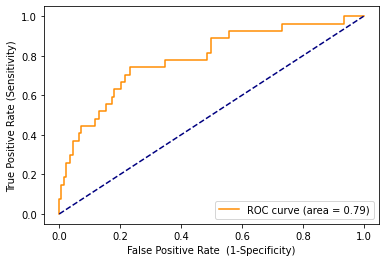

In [88]:
y_probs_grid_boost = best_grid_boost.predict_proba(X_test) # probability prediction
fpr_grid_boost, tpr_grid_boost, _ = metrics.roc_curve(y_test, y_probs_grid_boost[:,1])
auc_grid_boost = metrics.auc(fpr_grid_boost, tpr_grid_boost)
plt.figure()
plt.plot(fpr_grid_boost, tpr_grid_boost, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_grid_boost)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

# Cross Validation

#### calc

In [89]:
clf_list = [clf_GBoost,clf_NBayes,clf_svm,clf_dec,rf,
            best_grid_boost,best_grid_nb,best_grid_svm,best_grid_dec,best_grid_rf,
            best_random_boost,best_random_nb,best_random_svm,best_random_dec,best_random_rf]
cm_dict, auc_dict = {}, {}
kf = KFold(n_splits=10, shuffle=True, random_state=42) #for cross validation
k = 0
for train_index, test_index in kf.split(X):
    k+=1
    print("------",k,"------")
    # split to train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for clf in clf_list:
        # train the model and make a prediction
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        cm = metrics.confusion_matrix(y_test, y_pred)
        y_probs = clf.predict_proba(X_test) # probability prediction
        fpr, tpr, _ = metrics.roc_curve(y_test, y_probs[:,1])
        auc = metrics.auc(fpr, tpr)
        # save the results
        cm_list = cm_dict.get(clf,[])
        cm_list.append(cm)
        cm_dict[clf] = cm_list
        auc_list = auc_dict.get(clf,[])
        auc_list.append(auc)
        auc_dict[clf] = auc_list

------ 1 ------
------ 2 ------
------ 3 ------
------ 4 ------
------ 5 ------
------ 6 ------
------ 7 ------
------ 8 ------
------ 9 ------
------ 10 ------


#### Averages

In [90]:
acc_dict = {}
recall_dict = {}
for clf in clf_list:
    print(clf)
    acc = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_dict[clf]]
    acc_dict[clf] = acc 
    print("mean accuracy: ", np.mean(acc))
    recall = [(cm[1][1])/(cm[1][1]+cm[1][0]) for cm in cm_dict[clf]]
    recall_dict[clf] = recall
    print("mean recall: ", np.mean(recall))
    print("mean AUC: ", np.mean(auc_dict[clf]))

GradientBoostingClassifier(random_state=42)
mean accuracy:  0.8742971887550202
mean recall:  0.3108619206279205
mean AUC:  0.8310480423280839
GaussianNB()
mean accuracy:  0.7786454910551296
mean recall:  0.5129132652449623
mean AUC:  0.7553952800092516
SVC(C=0.9, probability=True, random_state=42)
mean accuracy:  0.8688864549105514
mean recall:  0.18915137591043696
mean AUC:  0.7656776358990701
DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=15, random_state=42)
mean accuracy:  0.8453048557867835
mean recall:  0.2849710367850915
mean AUC:  0.720305656391347
RandomForestClassifier(random_state=42)
mean accuracy:  0.8694742606790798
mean recall:  0.3082533648286213
mean AUC:  0.8279930303695953
GradientBoostingClassifier(max_features='auto', min_samples_leaf=5,
                           min_samples_split=10, n_estimators=500,
                           random_state=42, subsample=0.3)
mean accuracy:  0.8682657904344652

best according to accuracy and AUC:

Gradient boost regular clf_GBoost

random forest regular rf

Gradient boost random best_random_boost

random forest random best_random_rf

gradient boosting grid best_grid_boost

random forest grid best_grid_rf

# T Testing for best classifiers

## best_grid_boost vs clf_GBoost (grid boost vs normal boost)

In [91]:
ttest,pval = stats.ttest_rel(acc_dict[best_grid_boost], acc_dict[clf_GBoost])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.42366755791064936
accept null hypothesis


In [92]:
ttest,pval = stats.ttest_rel(recall_dict[best_grid_boost], recall_dict[clf_GBoost])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.0244518628936399
reject null hypothesis


In [93]:
ttest,pval = stats.ttest_rel(auc_dict[best_grid_boost], auc_dict[clf_GBoost])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.06934430540693325
accept null hypothesis


GBoost regular == best_grid_boost but grid has better recall

## next best_random_rf vs best_grid_rf

In [94]:
ttest,pval = stats.ttest_rel(acc_dict[best_random_rf], acc_dict[best_grid_rf])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.6223753724584198
accept null hypothesis


In [95]:
ttest,pval = stats.ttest_rel(recall_dict[best_random_rf], recall_dict[best_grid_rf])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.8966711003678568
accept null hypothesis


In [96]:
ttest,pval = stats.ttest_rel(auc_dict[best_random_rf], auc_dict[best_grid_rf])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.191218343747669
accept null hypothesis


best_grid_rf == best_random_rf

## next best_grid_rf vs rf

In [97]:
ttest,pval = stats.ttest_rel(acc_dict[rf], acc_dict[best_grid_rf])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.4076775781338675
accept null hypothesis


In [98]:
ttest,pval = stats.ttest_rel(recall_dict[rf], recall_dict[best_grid_rf])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.0003758624815369989
reject null hypothesis


In [99]:
ttest,pval = stats.ttest_rel(auc_dict[rf], auc_dict[best_grid_rf])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.7265402637273747
accept null hypothesis


## so far: grid boost > normal boost, normal rf > grid rf == random rf

grid rf == normal rf but normal has better recall

## next rf vs clf_GBoost

In [100]:
ttest,pval = stats.ttest_rel(acc_dict[rf], acc_dict[best_grid_boost])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.8703899131527995
accept null hypothesis


In [101]:
ttest,pval = stats.ttest_rel(recall_dict[rf], recall_dict[best_grid_boost])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.05356646429445385
accept null hypothesis


In [102]:
ttest,pval = stats.ttest_rel(auc_dict[rf], auc_dict[best_grid_boost], alternative = 'less')
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.998382682146033
accept null hypothesis


so far: grid boost > normal boost == normal rf > grid rf == random rf

## next random boost vs normal boost

In [103]:
ttest,pval = stats.ttest_rel(acc_dict[best_random_boost], acc_dict[clf_GBoost])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.7002834151919168
accept null hypothesis


In [104]:
ttest,pval = stats.ttest_rel(recall_dict[best_random_boost], recall_dict[clf_GBoost])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.0019556432880008705
reject null hypothesis


In [105]:
ttest,pval = stats.ttest_rel(auc_dict[best_random_boost], auc_dict[clf_GBoost])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.43280420026383615
accept null hypothesis


## Also checking random boost vs grid boost

In [106]:
ttest,pval = stats.ttest_rel(acc_dict[best_random_boost], acc_dict[best_grid_boost])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.5614610134580431
accept null hypothesis


In [107]:
ttest,pval = stats.ttest_rel(recall_dict[best_random_boost], recall_dict[best_grid_boost])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.6383811869724673
accept null hypothesis


In [218]:
ttest,pval = stats.ttest_rel(auc_dict[best_random_boost], auc_dict[best_grid_boost], alternative= 'less')
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.9875327012683679
accept null hypothesis


## clf_GBoost == best_random_boost but random has a better recall value
## in accuracy and recall random boost == grid boost but grid has better AUC

# The best classifier is Graident Boost with grid search

# Visualization of random forest

In [109]:
tree_grid = {'n_estimators': [int(x) for x in np.linspace(1, 780, 20)]}

tree_grid_search = GridSearchCV(rf, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = 5,
                                scoring = 'accuracy')
tree_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [1, 42, 83, 124, 165, 206, 247, 288,
                                          329, 370, 411, 452, 493, 534, 575,
                                          616, 657, 698, 739, 780]},
             scoring='accuracy', verbose=2)

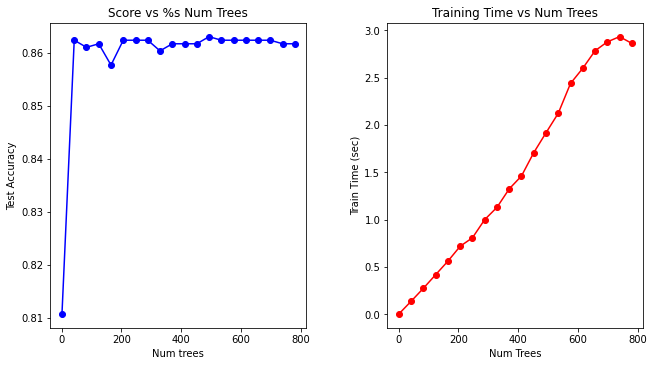

In [110]:
test_scores = tree_grid_search.cv_results_['mean_test_score']
train_time = tree_grid_search.cv_results_['mean_fit_time']
param_values = list(tree_grid_search.cv_results_['param_n_estimators'])

plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.plot(param_values, test_scores, 'bo-', label = 'test')
plt.xlabel('Num trees')
plt.ylabel('Test Accuracy')
plt.title('Score vs %s Num Trees' )

plt.subplot(122)
plt.plot(param_values, train_time, 'ro-')
plt.xlabel('Num Trees')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs Num Trees')

plt.tight_layout(pad = 4)

In [111]:
tree = best_grid_rf.estimators_[15]

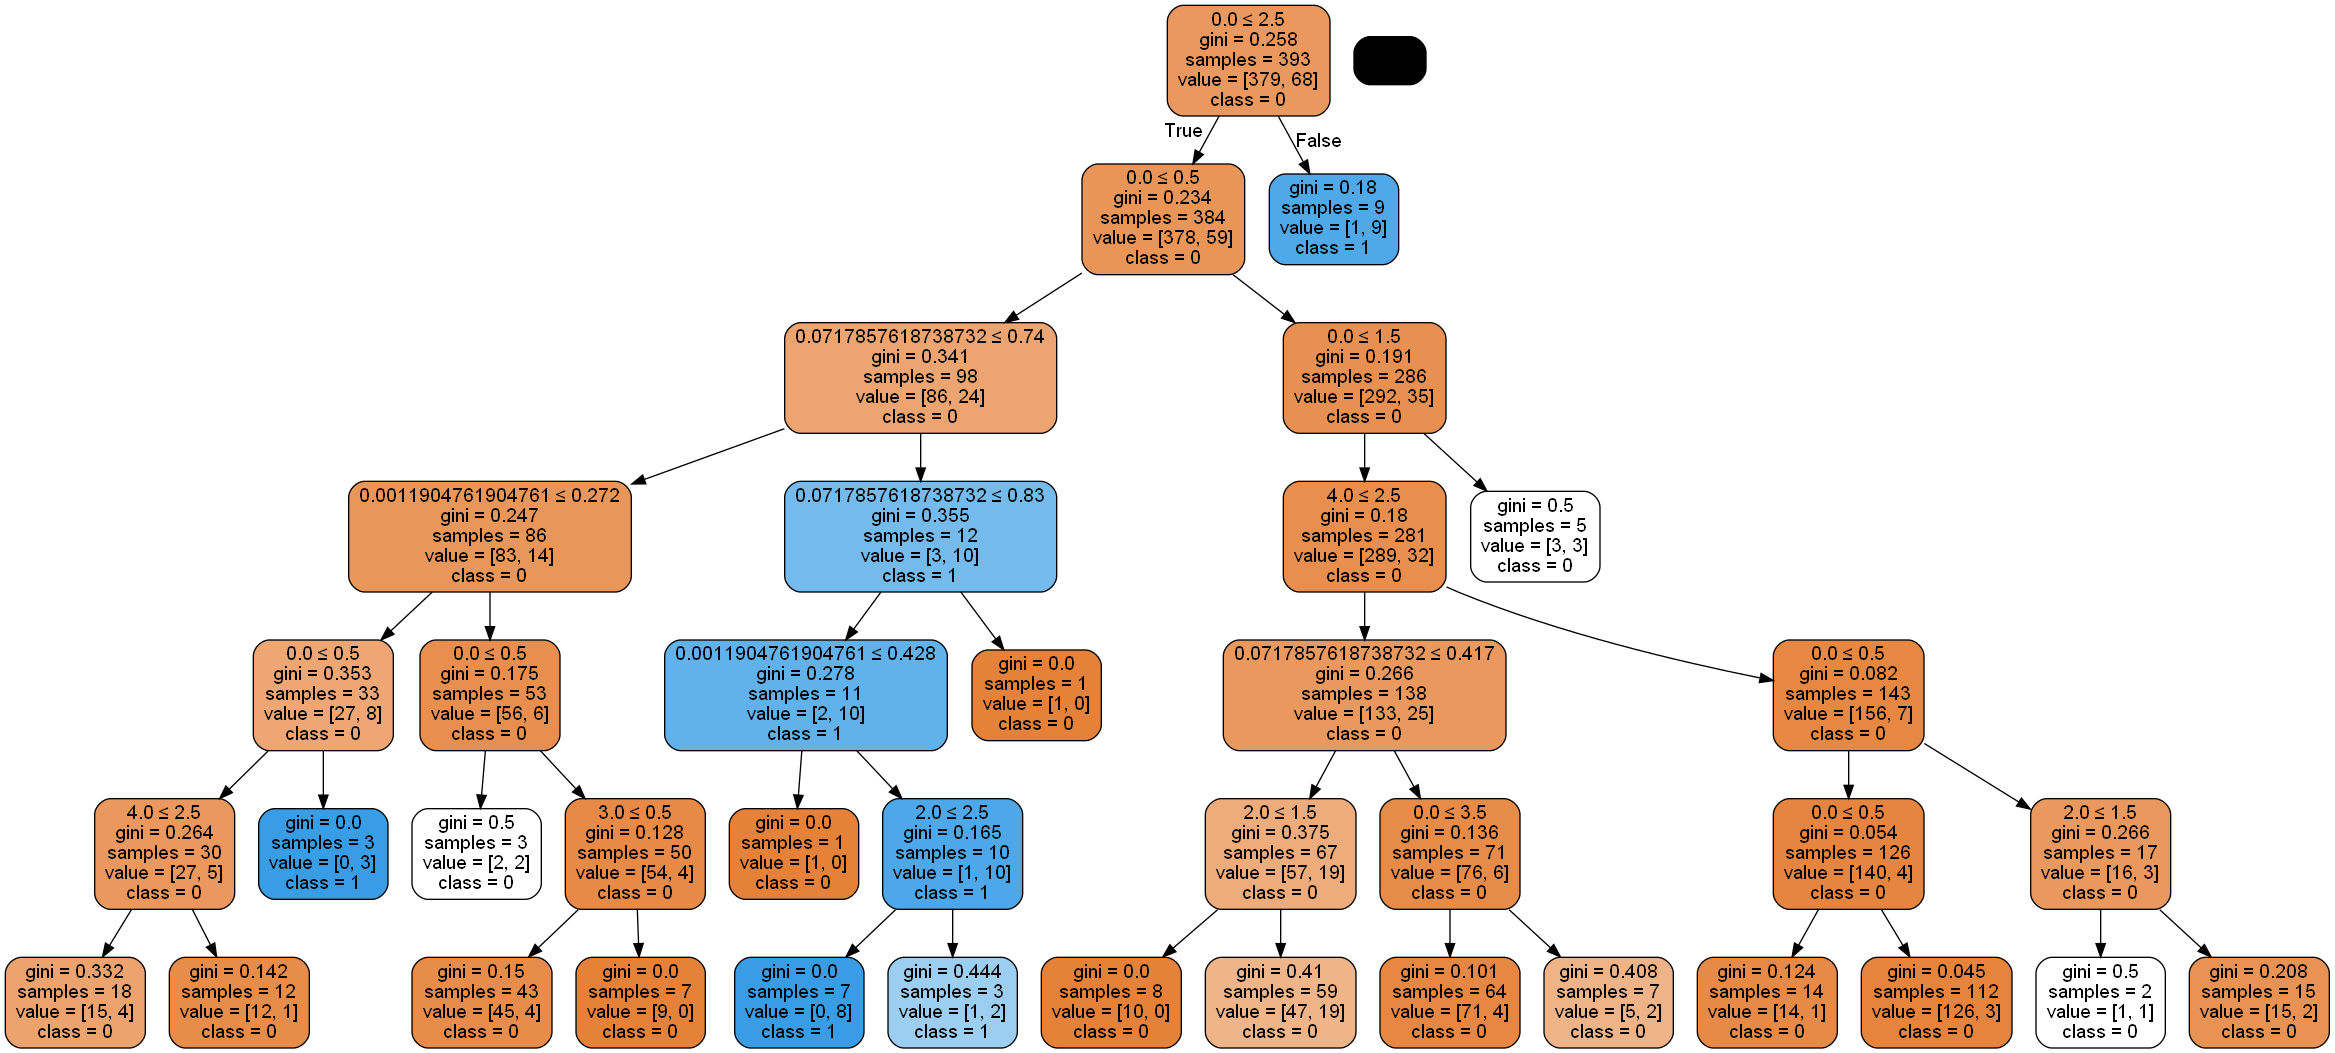

In [112]:
dot = export_graphviz(tree, filled=True, rounded=True, 
                special_characters=True,feature_names = X[0,:],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

# Test Data Cleaning

## Looking at data

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [114]:
data_path = "Marketing_Campaign_Test.csv"

df = pd.read_csv(data_path)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     560 non-null    int64  
 1   Year_Birth             551 non-null    float64
 2   Education              556 non-null    object 
 3   Status                 543 non-null    object 
 4   Income                 543 non-null    float64
 5   Num_of_kids            556 non-null    float64
 6   Num_of_Teen            550 non-null    float64
 7   Registration_date      560 non-null    object 
 8   Recency                560 non-null    int64  
 9   Mnt_Fruits             558 non-null    float64
 10  Mnt_Meat               558 non-null    float64
 11  Mnt_sweet              552 non-null    float64
 12  Mnt_Wines              558 non-null    float64
 13  Mnt_Gold_Products      558 non-null    float64
 14  Mnt_Fish               558 non-null    float64
 15  Num_We

## Dropping indevidualy unique, identical or contradicting data

In [116]:
df = df.drop(['ID','Revenue','Cost_Contact','Recency'], axis=1)

## Checking for primarily empty rows to remove

In [117]:
df = df.drop(df[df.isnull().sum(axis=1)>13].index)
df[df.isnull().sum(axis=1)>13]

Empty DataFrame
Columns: [Year_Birth, Education, Status, Income, Num_of_kids, Num_of_Teen, Registration_date, Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Wines, Mnt_Gold_Products, Mnt_Fish, Num_Web_Purchases, Num_Store_Purchases, Num_Deals_Purchases, Num_Catalog_Purchases, Num_Web_Visits, Response_Campaign_1, Response_Campaign_2, Response_Campaign_3, Response_Campaign_4, Response_Campaign_5, Complain]
Index: []

[0 rows x 24 columns]

## Filling in the heavily skewed with the mode

In [118]:
for col in ['Response_Campaign_1','Response_Campaign_2','Response_Campaign_3','Response_Campaign_4','Response_Campaign_5','Complain']:
    df[col] = df[col].fillna(df[col].mode()[0])

## Cleaning Income

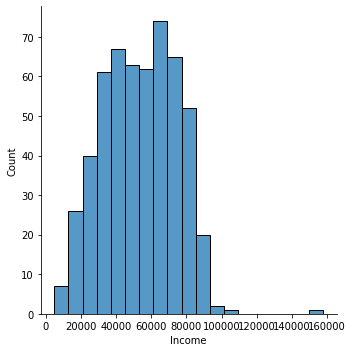

In [119]:
sns.displot(df['Income'])

In [120]:
dt = df['Income']
data_mean, data_std = np.mean(dt), np.std(dt)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
df.loc[(df['Income'] > upper) | (df['Income'] < lower)]

Year_Birth Education    Status    Income  Num_of_kids  Num_of_Teen  \
531      1971.0    Master  Together  157733.0          1.0          0.0   

    Registration_date  Mnt_Fruits  Mnt_Meat  Mnt_sweet  ...  \
531        04/06/2013        39.0       1.0        9.0  ...   

     Num_Store_Purchases  Num_Deals_Purchases  Num_Catalog_Purchases  \
531                  1.0                  0.0                    1.0   

     Num_Web_Visits  Response_Campaign_1  Response_Campaign_2  \
531             2.0                  0.0                  0.0   

     Response_Campaign_3  Response_Campaign_4  Response_Campaign_5  Complain  
531                  0.0                  0.0                  0.0       0.0  

[1 rows x 24 columns]

In [121]:
df = df.drop(531)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
df.loc[(df['Income'] > upper) | (df['Income'] < lower)]

Empty DataFrame
Columns: [Year_Birth, Education, Status, Income, Num_of_kids, Num_of_Teen, Registration_date, Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Wines, Mnt_Gold_Products, Mnt_Fish, Num_Web_Purchases, Num_Store_Purchases, Num_Deals_Purchases, Num_Catalog_Purchases, Num_Web_Visits, Response_Campaign_1, Response_Campaign_2, Response_Campaign_3, Response_Campaign_4, Response_Campaign_5, Complain]
Index: []

[0 rows x 24 columns]

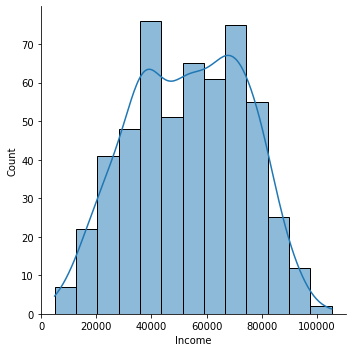

In [122]:
sns.displot(df['Income'], kde=True)

In [123]:
df[df['Income'].isnull()]

Year_Birth   Education    Status  Income  Num_of_kids  Num_of_Teen  \
1        1957.0         PhD   Married     NaN          2.0          1.0   
2        1956.0  Graduation  Together     NaN          1.0          1.0   
11       1969.0      Master  Together     NaN          1.0          1.0   
42          NaN         NaN       NaN     NaN          NaN          NaN   
75       1972.0         PhD   Married     NaN          0.0          1.0   
188      1981.0         PhD    Single     NaN          1.0          0.0   
194         NaN         NaN       NaN     NaN          NaN          NaN   
210      1953.0  Graduation   Married     NaN          0.0          1.0   
332      1964.0    2n Cycle    Single     NaN          1.0          1.0   
355         NaN         NaN       NaN     NaN          NaN          NaN   
382      1972.0      Master    Single     NaN          1.0          0.0   
385         NaN         NaN       NaN     NaN          NaN          NaN   
386      1959.0  Graduation   Married     NaN          0.0          0.0   
438      1972.0  Graduation  Together     NaN          1.0          0.0   
490      1960.0  Graduation  Divorced     NaN          0.0          1.0   
542      1978.0    2n Cycle  Together     NaN          0.0          0.0   
553      1959.0         PhD    Single     NaN          0.0          0.0   

    Registration_date  Mnt_Fruits  Mnt_Meat  Mnt_sweet  ...  \
1          19/11/2012       230.0      42.0      192.0  ...   
2          14/09/2012       454.0       0.0      171.0  ...   
11         18/05/2013       375.0      42.0       48.0  ...   
42         29/10/2012       194.0       2.0       56.0  ...   
75         07/03/2013       516.0       0.0       21.0  ...   
188        31/05/2013        23.0       0.0       15.0  ...   
194        24/03/2013         7.0      11.0        3.0  ...   
210        24/02/2014        32.0       0.0        5.0  ...   
332        12/01/2014         5.0       1.0        9.0  ...   
355        03/04/2014      1017.0      33.0      417.0  ...   
382        23/03/2014        15.0       2.0       10.0  ...   
385        16/02/2013        32.0       0.0        8.0  ...   
386        28/12/2012         6.0       1.0        7.0  ...   
438        18/06/2013         6.0       2.0       15.0  ...   
490        20/04/2014        10.0       0.0       11.0  ...   
542        12/08/2012        32.0       2.0     1607.0  ...   
553        05/11/2013        81.0      11.0       50.0  ...   

     Num_Store_Purchases  Num_Deals_Purchases  Num_Catalog_Purchases  \
1                    7.0                  2.0                    8.0   
2                    9.0                  2.0                    8.0   
11                   4.0                 10.0                    4.0   
42                   4.0                  1.0                    6.0   
75                   8.0                  2.0                    7.0   
188                  3.0                  0.0                    3.0   
194                  1.0                  1.0                    3.0   
210                  2.0                  0.0                    3.0   
332                  1.0                  0.0                    2.0   
355                  5.0                  5.0                    5.0   
382                  1.0                  0.0                    3.0   
385                  1.0                  0.0                    4.0   
386                  1.0                  1.0                    2.0   
438                  1.0                  0.0                    3.0   
490                  1.0                  2.0                    2.0   
542                  0.0                  0.0                    1.0   
553                  1.0                  3.0                    4.0   

     Num_Web_Visits  Response_Campaign_1  Response_Campaign_2  \
1              18.0                  0.0                  0.0   
2              16.0                  0.0                  0.0   
11              6.0        

In [124]:
mu = df['Income'].mean()
sigma = df['Income'].std()

In [125]:
indexes = df[df['Income'].isna()].index

In [126]:
for row in indexes:
    df['Income'][row] = np.random.normal(mu, sigma)
df[df['Income'].isnull()]

C:\Users\obaro\AppData\Local\Temp\ipykernel_8632\1040533483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'][row] = np.random.normal(mu, sigma)


Empty DataFrame
Columns: [Year_Birth, Education, Status, Income, Num_of_kids, Num_of_Teen, Registration_date, Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Wines, Mnt_Gold_Products, Mnt_Fish, Num_Web_Purchases, Num_Store_Purchases, Num_Deals_Purchases, Num_Catalog_Purchases, Num_Web_Visits, Response_Campaign_1, Response_Campaign_2, Response_Campaign_3, Response_Campaign_4, Response_Campaign_5, Complain]
Index: []

[0 rows x 24 columns]

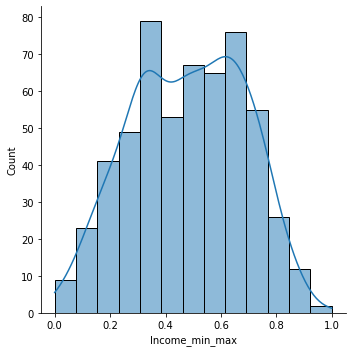

In [127]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['Income']))
df['Income_min_max'] = scaler.transform(pd.DataFrame(df['Income']))
sns.displot(df['Income_min_max'],kde=True)

## Cleaning Year_Birth

In [128]:
df[df['Year_Birth']<1940]

Year_Birth Education Status   Income  Num_of_kids  Num_of_Teen  \
316      1900.0  2n Cycle    NaN  36640.0          1.0          0.0   

    Registration_date  Mnt_Fruits  Mnt_Meat  Mnt_sweet  ...  \
316        26/09/2013        15.0       6.0        8.0  ...   

     Num_Deals_Purchases  Num_Catalog_Purchases  Num_Web_Visits  \
316                  1.0                    2.0            10.0   

     Response_Campaign_1  Response_Campaign_2  Response_Campaign_3  \
316                  0.0                  0.0                  0.0   

     Response_Campaign_4  Response_Campaign_5  Complain  Income_min_max  
316                  0.0                  0.0       1.0        0.315863  

[1 rows x 25 columns]

In [129]:
df = df.drop(316)
df[df['Year_Birth']<1940]

Empty DataFrame
Columns: [Year_Birth, Education, Status, Income, Num_of_kids, Num_of_Teen, Registration_date, Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Wines, Mnt_Gold_Products, Mnt_Fish, Num_Web_Purchases, Num_Store_Purchases, Num_Deals_Purchases, Num_Catalog_Purchases, Num_Web_Visits, Response_Campaign_1, Response_Campaign_2, Response_Campaign_3, Response_Campaign_4, Response_Campaign_5, Complain, Income_min_max]
Index: []

[0 rows x 25 columns]

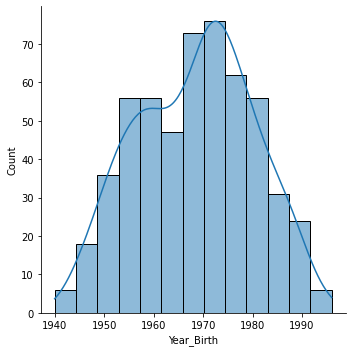

In [130]:
sns.displot(df['Year_Birth'],kde=True)

In [131]:
df[df['Year_Birth'].isnull()]

Year_Birth   Education Status        Income  Num_of_kids  Num_of_Teen  \
42          NaN         NaN    NaN  64959.069702          NaN          NaN   
194         NaN         NaN    NaN   5380.146567          NaN          NaN   
206         NaN      Master  Widow  44551.000000          0.0          1.0   
252         NaN  Graduation  Widow  42429.000000          0.0          1.0   
329         NaN  Graduation  Widow  58330.000000          0.0          1.0   
355         NaN         NaN    NaN  36123.061419          NaN          NaN   
375         NaN  Graduation  Widow  73455.000000          0.0          0.0   
378         NaN  Graduation  Widow  72298.000000          0.0          0.0   
385         NaN         NaN    NaN  62135.483886          NaN          NaN   

    Registration_date  Mnt_Fruits  Mnt_Meat  Mnt_sweet  ...  \
42         29/10/2012       194.0       2.0       56.0  ...   
194        24/03/2013         7.0      11.0        3.0  ...   
206        31/08/2013       182.0       4.0       33.0  ...   
252        11/02/2014        55.0       0.0        6.0  ...   
329        25/12/2013       445.0      53.0      213.0  ...   
355        03/04/2014      1017.0      33.0      417.0  ...   
375        28/10/2013       901.0      61.0      757.0  ...   
378        10/03/2014       625.0      35.0      169.0  ...   
385        16/02/2013        32.0       0.0        8.0  ...   

     Num_Deals_Purchases  Num_Catalog_Purchases  Num_Web_Visits  \
42                   1.0                    6.0            16.0   
194                  1.0                    3.0            10.0   
206                  1.0                    5.0            14.0   
252                  1.0                    3.0            10.0   
329                  4.0                   13.0             8.0   
355                  5.0                    5.0            10.0   
375                  5.0                   10.0             6.0   
378                  3.0                    6.0             2.0   
385                  0.0                    4.0            12.0   

     Response_Campaign_1  Response_Campaign_2  Response_Campaign_3  \
42                   0.0                  0.0                  0.0   
194                  0.0                  0.0                  0.0   
206                  0.0                  0.0                  0.0   
252                  0.0                  0.0                  0.0   
329                  0.0                  0.0                  0.0   
355                  0.0                  1.0                  1.0   
375                  0.0                  1.0                  0.0   
378                  0.0                  1.0                  1.0   
385                  0.0                  0.0                  0.0   

     Response_Campaign_4  Response_Campaign_5  Complain  Income_min_max  
42                   0.0                  0.0       0.0        0.597337  
194                  0.0                  0.0       0.0        0.005160  
206                  0.0                  0.0       0.0        0.394494  
252                  0.0                  0.0       0.0        0.373402  
329                  0.0                  0.0       0.0        0.531448  
355                  0.0                  0.0       0.0        0.310725  
375                  0.0                  0.0       0.0        0.681781  
378                  0.0                  0.0       0.0        0.670281  
385                  0.0                  0.0       0.0        0.569272  

[9 rows x 25 columns]

In [132]:
mu = df['Year_Birth'].mean()
sigma = df['Year_Birth'].std()

In [133]:
indexes = df[df['Year_Birth'].isna()].index

In [134]:
for row in indexes:
    df['Year_Birth'][row] = np.random.normal(mu, sigma)
df[df['Year_Birth'].isnull()]

C:\Users\obaro\AppData\Local\Temp\ipykernel_8632\3550837081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Birth'][row] = np.random.normal(mu, sigma)


Empty DataFrame
Columns: [Year_Birth, Education, Status, Income, Num_of_kids, Num_of_Teen, Registration_date, Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Wines, Mnt_Gold_Products, Mnt_Fish, Num_Web_Purchases, Num_Store_Purchases, Num_Deals_Purchases, Num_Catalog_Purchases, Num_Web_Visits, Response_Campaign_1, Response_Campaign_2, Response_Campaign_3, Response_Campaign_4, Response_Campaign_5, Complain, Income_min_max]
Index: []

[0 rows x 25 columns]

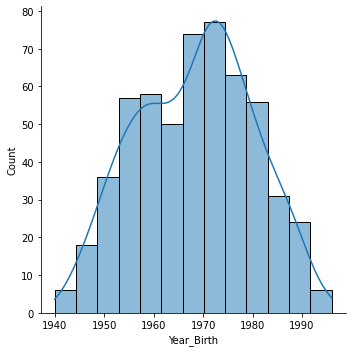

In [135]:
sns.displot(df['Year_Birth'],kde=True)

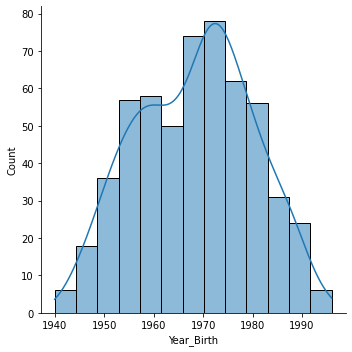

In [136]:
df['Year_Birth'] = df['Year_Birth'].astype(np.int64)
sns.displot(df['Year_Birth'],kde=True)

## Cleaning Status

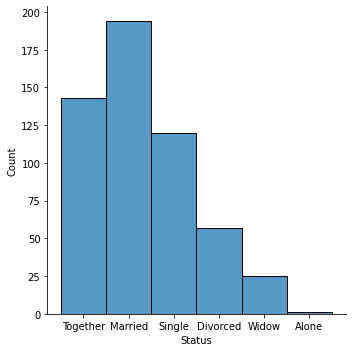

In [137]:
sns.displot(df['Status'])

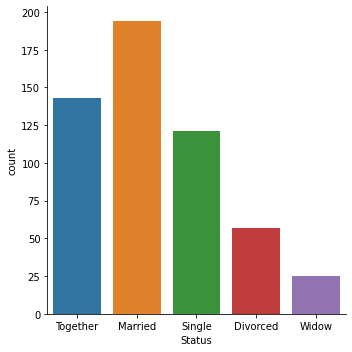

In [138]:
df['Status'] = df['Status'].replace('Alone','Single')
sns.catplot(x = 'Status', kind = 'count', data = df)

In [139]:
df[df['Status'].isnull()]

Year_Birth   Education Status        Income  Num_of_kids  Num_of_Teen  \
3          1954         PhD    NaN  72550.000000          1.0          1.0   
42         1974         NaN    NaN  64959.069702          NaN          NaN   
83         1976  Graduation    NaN  53359.000000          1.0          1.0   
122        1952  Graduation    NaN  69142.000000          0.0          1.0   
131        1996    2n Cycle    NaN   7500.000000          0.0          0.0   
194        1962         NaN    NaN   5380.146567          NaN          NaN   
231        1946  Graduation    NaN  37760.000000          0.0          0.0   
235        1985      Master    NaN  20559.000000          1.0          0.0   
262        1972  Graduation    NaN  51813.000000          1.0          1.0   
270        1989  Graduation    NaN  38360.000000          1.0          0.0   
271        1980  Graduation    NaN  80011.000000          0.0          1.0   
346        1953  Graduation    NaN  62551.000000          0.0          0.0   
355        1959         NaN    NaN  36123.061419          NaN          NaN   
385        1971         NaN    NaN  62135.483886          NaN          NaN   
413        1946      Master    NaN  68657.000000          0.0          0.0   
416        1975         PhD    NaN  74165.000000          0.0          0.0   

    Registration_date  Mnt_Fruits  Mnt_Meat  Mnt_sweet  ...  \
3          08/11/2012       826.0      50.0      317.0  ...   
42         29/10/2012       194.0       2.0       56.0  ...   
83         27/05/2013       173.0       4.0       30.0  ...   
122        29/06/2014       448.0       4.0       34.0  ...   
131        09/11/2012         3.0      18.0       14.0  ...   
194        24/03/2013         7.0      11.0        3.0  ...   
231        31/08/2012        84.0       5.0       38.0  ...   
235        12/03/2013        13.0       1.0       29.0  ...   
262        11/04/2013        51.0       2.0        7.0  ...   
270        31/05/2013        36.0       2.0       42.0  ...   
271        29/04/2013       421.0      76.0      536.0  ...   
346        18/11/2013       125.0      16.0       98.0  ...   
355        03/04/2014      1017.0      33.0      417.0  ...   
385        16/02/2013        32.0       0.0        8.0  ...   
413        20/02/2013       482.0      34.0      471.0  ...   
416        01/05/2013      1001.0      12.0      240.0  ...   

     Num_Deals_Purchases  Num_Catalog_Purchases  Num_Web_Visits  \
3                    2.0                   12.0            16.0   
42                   1.0                    6.0            16.0   
83                   1.0                    4.0            14.0   
122                  1.0                    7.0            10.0   
131                  1.0                    3.0             0.0   
194                  1.0                    3.0            10.0   
231                  1.0                    6.0            14.0   
235                  0.0                    3.0            16.0   
262                  0.0                    3.0            14.0   
270                  1.0                    4.0             6.0   
271                  6.0                    5.0             8.0   
346                  7.0                    4.0             6.0   
355                  5.0                    5.0            10.0   
385                  0.0                    4.0            12.0   
413                  5.0                    9.0            14.0   
416                  4.0                   10.0             4.0   

     Response_Campaign_1  Response_Campaign_2  Response_Campaign_3  \
3                    0.0                  0.0                  0.0   
42                   0.0                  0.0                  0.0   
83                   0.0                  0.0                  0.0   
122                  0.0                  1.0                  0.0   
131                  0.0                  0.0                  0.0   
194                  0.0                  0.0 

In [140]:
df['Status_cat'] = df['Status'].astype('category').cat.codes

In [141]:
df.groupby(['Status','Status_cat']).size()

Status    Status_cat
Divorced  0              57
Married   1             194
Single    2             121
Together  3             143
Widow     4              25
dtype: int64

In [142]:
df[df['Status_cat'] == -1]

Year_Birth   Education Status        Income  Num_of_kids  Num_of_Teen  \
3          1954         PhD    NaN  72550.000000          1.0          1.0   
42         1974         NaN    NaN  64959.069702          NaN          NaN   
83         1976  Graduation    NaN  53359.000000          1.0          1.0   
122        1952  Graduation    NaN  69142.000000          0.0          1.0   
131        1996    2n Cycle    NaN   7500.000000          0.0          0.0   
194        1962         NaN    NaN   5380.146567          NaN          NaN   
231        1946  Graduation    NaN  37760.000000          0.0          0.0   
235        1985      Master    NaN  20559.000000          1.0          0.0   
262        1972  Graduation    NaN  51813.000000          1.0          1.0   
270        1989  Graduation    NaN  38360.000000          1.0          0.0   
271        1980  Graduation    NaN  80011.000000          0.0          1.0   
346        1953  Graduation    NaN  62551.000000          0.0          0.0   
355        1959         NaN    NaN  36123.061419          NaN          NaN   
385        1971         NaN    NaN  62135.483886          NaN          NaN   
413        1946      Master    NaN  68657.000000          0.0          0.0   
416        1975         PhD    NaN  74165.000000          0.0          0.0   

    Registration_date  Mnt_Fruits  Mnt_Meat  Mnt_sweet  ...  \
3          08/11/2012       826.0      50.0      317.0  ...   
42         29/10/2012       194.0       2.0       56.0  ...   
83         27/05/2013       173.0       4.0       30.0  ...   
122        29/06/2014       448.0       4.0       34.0  ...   
131        09/11/2012         3.0      18.0       14.0  ...   
194        24/03/2013         7.0      11.0        3.0  ...   
231        31/08/2012        84.0       5.0       38.0  ...   
235        12/03/2013        13.0       1.0       29.0  ...   
262        11/04/2013        51.0       2.0        7.0  ...   
270        31/05/2013        36.0       2.0       42.0  ...   
271        29/04/2013       421.0      76.0      536.0  ...   
346        18/11/2013       125.0      16.0       98.0  ...   
355        03/04/2014      1017.0      33.0      417.0  ...   
385        16/02/2013        32.0       0.0        8.0  ...   
413        20/02/2013       482.0      34.0      471.0  ...   
416        01/05/2013      1001.0      12.0      240.0  ...   

     Num_Catalog_Purchases  Num_Web_Visits  Response_Campaign_1  \
3                     12.0            16.0                  0.0   
42                     6.0            16.0                  0.0   
83                     4.0            14.0                  0.0   
122                    7.0            10.0                  0.0   
131                    3.0             0.0                  0.0   
194                    3.0            10.0                  0.0   
231                    6.0            14.0                  0.0   
235                    3.0            16.0                  0.0   
262                    3.0            14.0                  0.0   
270                    4.0             6.0                  0.0   
271                    5.0             8.0                  0.0   
346                    4.0             6.0                  1.0   
355                    5.0            10.0                  0.0   
385                    4.0            12.0                  0.0   
413                    9.0            14.0                  0.0   
416                   10.0             4.0                  0.0   

     Response_Campaign_2  Response_Campaign_3  Response_Campaign_4  \
3                    0.0                  0.0                  0.0   
42                   0.0                  0.0                  0.0   
83                   0.0                  0.0                  0.0   
122                  1.0                  0.0                  0.0   
131                  0.0                  0.0                  0.0   
194                  0.0                  0.0 

In [143]:
df.loc[df[df['Status_cat'] == -1].index, 'Status_cat'] = df['Status_cat'].mode()[0]

In [144]:
for row in df[df['Status'].isna()].index:
    stat = df['Status_cat'][row]
    if stat == 0:
        df['Status'][row] = 'Divorced'
    if stat == 1:
        df['Status'][row] = 'Married'
    if stat == 2:
        df['Status'][row] = 'Single'
    if stat == 3:
        df['Status'][row] = 'Together'
    if stat == 4:
        df['Status'][row] = 'Widow'

C:\Users\obaro\AppData\Local\Temp\ipykernel_8632\3569881234.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'][row] = 'Married'


1    210
3    143
2    121
0     57
4     25
Name: Status_cat, dtype: int64 
 Married     210
Together    143
Single      121
Divorced     57
Widow        25
Name: Status, dtype: int64


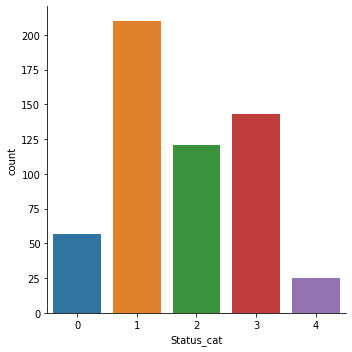

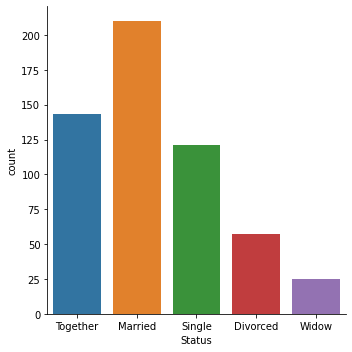

In [145]:
sns.catplot(x = 'Status_cat', kind = 'count', data = df)
sns.catplot(x = 'Status', kind = 'count', data = df)
print(df['Status_cat'].value_counts(),'\n',df['Status'].value_counts())


In [146]:
df[df['Status'].isna()]

Empty DataFrame
Columns: [Year_Birth, Education, Status, Income, Num_of_kids, Num_of_Teen, Registration_date, Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Wines, Mnt_Gold_Products, Mnt_Fish, Num_Web_Purchases, Num_Store_Purchases, Num_Deals_Purchases, Num_Catalog_Purchases, Num_Web_Visits, Response_Campaign_1, Response_Campaign_2, Response_Campaign_3, Response_Campaign_4, Response_Campaign_5, Complain, Income_min_max, Status_cat]
Index: []

[0 rows x 26 columns]

## Cleaning Num_Web_Visits

In [147]:
df[df['Num_Web_Visits'] == 0]['Num_Web_Purchases']

131    3.0
307    1.0
308    1.0
431    1.0
476    1.0
480    1.0
514    1.0
538    0.0
542    0.0
Name: Num_Web_Purchases, dtype: float64

In [148]:
indexes = df[df['Num_Web_Visits'] == 0]['Num_Web_Purchases'].index

In [149]:
for row in indexes:
    df.loc[row, 'Num_Web_Visits'] = df['Num_Web_Visits'].median() 

In [150]:
df[df['Num_Web_Visits'] == 0]['Num_Web_Purchases']

Series([], Name: Num_Web_Purchases, dtype: float64)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 558
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             556 non-null    int64  
 1   Education              552 non-null    object 
 2   Status                 556 non-null    object 
 3   Income                 556 non-null    float64
 4   Num_of_kids            552 non-null    float64
 5   Num_of_Teen            546 non-null    float64
 6   Registration_date      556 non-null    object 
 7   Mnt_Fruits             556 non-null    float64
 8   Mnt_Meat               556 non-null    float64
 9   Mnt_sweet              550 non-null    float64
 10  Mnt_Wines              556 non-null    float64
 11  Mnt_Gold_Products      556 non-null    float64
 12  Mnt_Fish               556 non-null    float64
 13  Num_Web_Purchases      543 non-null    float64
 14  Num_Store_Purchases    556 non-null    float64
 15  Num_De

## Cleaning Num_Web_Purchases

[12.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0. nan]


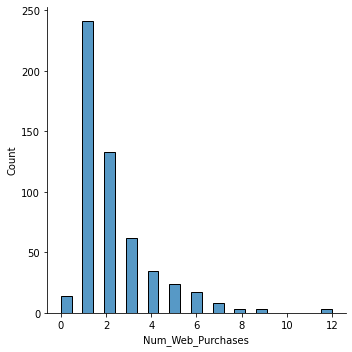

In [152]:
print(df['Num_Web_Purchases'].unique())
sns.displot(df['Num_Web_Purchases'])

In [153]:
df[df['Num_Web_Purchases'].isna()]

Year_Birth   Education    Status       Income  Num_of_kids  Num_of_Teen  \
545        1979  Graduation   Married  17688.00000          1.0          0.0   
546        1975         PhD    Single  52614.00000          0.0          1.0   
547        1951  Graduation     Widow  67046.00000          0.0          1.0   
548        1958         PhD  Together  84460.00000          0.0          0.0   
549        1966  Graduation    Single  37070.00000          1.0          1.0   
550        1965  Graduation  Together  36317.00000          0.0          1.0   
551        1954  Graduation  Divorced  76773.00000          0.0          0.0   
553        1959         PhD    Single  69425.23159          0.0          0.0   
554        1986       Basic   Married  20425.00000          1.0          0.0   
555        1982  Graduation   Married  63211.00000          0.0          0.0   
556        1956    2n Cycle  Together  58821.00000          0.0          1.0   
557        1979       Basic    Single  16014.00000          1.0          1.0   
558        1978  Graduation    Single  60199.00000          1.0          2.0   

    Registration_date  Mnt_Fruits  Mnt_Meat  Mnt_sweet  ...  \
545        13/01/2013         2.0       2.0        1.0  ...   
546        01/12/2012       789.0       0.0      142.0  ...   
547        06/01/2013       544.0      35.0      133.0  ...   
548        04/01/2013       152.0      27.0      103.0  ...   
549        20/03/2013       231.0       7.0      137.0  ...   
550        22/05/2013        87.0       3.0       25.0  ...   
551        25/02/2013       516.0      56.0      449.0  ...   
553        05/11/2013        81.0      11.0       50.0  ...   
554        29/10/2012         4.0      12.0        5.0  ...   
555        02/11/2012       145.0     193.0      459.0  ...   
556        12/10/2013       513.0      14.0      154.0  ...   
557        17/03/2013         3.0       9.0        4.0  ...   
558        12/09/2013         8.0       1.0        7.0  ...   

     Num_Catalog_Purchases  Num_Web_Visits  Response_Campaign_1  \
545                    2.0            16.0                  0.0   
546                    8.0            16.0                  0.0   
547                    4.0             4.0                  0.0   
548                    4.0            10.0                  0.0   
549                    8.0            14.0                  0.0   
550                    4.0            14.0                  0.0   
551                   11.0             2.0                  0.0   
553                    4.0             2.0                  0.0   
554                    3.0             7.0                  0.0   
555                    7.0             2.0                  0.0   
556                    9.0             6.0                  0.0   
557                    4.0             3.0                  0.0   
558                    3.0             4.0                  0.0   

     Response_Campaign_2  Response_Campaign_3  Response_Campaign_4  \
545                  0.0                  0.0                  0.0   
546                  0.0                  0.0                  0.0   
547                  0.0                  0.0                  0.0   
548                  1.0                  1.0                  1.0   
549                  0.0                  0.0                  0.0   
550                  0.0                  0.0                  0.0   
551                  0.0                  0.0                  0.0   
553                  0.0                  0.0                  0.0   
554                  0.0                  0.0                  0.0   
555                  0.0                  0.0                  0.0   
556                  0.0                  0.0                  0.0   
557                  0.0                  0.0                  0.0   
558                  0.0                  0.0                  0.0   

     Response_Campaign_5  Complain  Income_min_max  Status_cat  
545             

In [154]:
df.loc[(df['Num_Web_Visits']  > 0) & (df['Num_Web_Visits'] <= 10), 'Web_Visits_Range'] = 0
df.loc[(df['Num_Web_Visits'] > 10) & (df['Num_Web_Visits'] <= 20), 'Web_Visits_Range'] = 1
df.loc[(df['Num_Web_Visits'] > 20) & (df['Num_Web_Visits'] <= 30), 'Web_Visits_Range'] = 2
df.loc[(df['Num_Web_Visits'] > 30) & (df['Num_Web_Visits'] <= 40), 'Web_Visits_Range'] = 3
df.loc[ df['Num_Web_Visits'] > 40, 'Web_Visits_Range'] = 4

In [155]:
df['Web_Visits_Range'].value_counts()

0.0    289
1.0    266
2.0      1
Name: Web_Visits_Range, dtype: int64

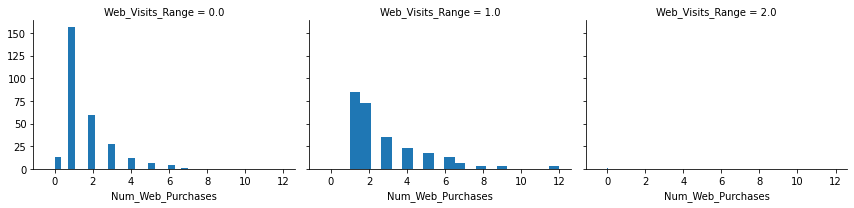

In [156]:
g = sns.FacetGrid(df, col='Web_Visits_Range', height=3, aspect= 1.33)
g.map(plt.hist, 'Num_Web_Purchases', bins=20)

In [157]:
for i in df['Web_Visits_Range'].unique(): 
    df['Num_Web_Purchases'][df['Web_Visits_Range']==i].median()
    print('For range ', i, ' the median is ', df.loc[df['Web_Visits_Range']==i , 'Num_Web_Purchases'].median())
    print('and the number of missing values is ', df.loc[df['Web_Visits_Range']==i , 'Num_Web_Purchases'].isnull().sum(), 
          'out of ',(df['Web_Visits_Range']==i).sum(), 'rows')

For range  1.0  the median is  2.0
and the number of missing values is  4 out of  266 rows
For range  0.0  the median is  1.0
and the number of missing values is  9 out of  289 rows
For range  2.0  the median is  0.0
and the number of missing values is  0 out of  1 rows


In [158]:
df.loc[df['Web_Visits_Range']==1 , 'Num_Web_Purchases'] = df['Num_Web_Purchases'][df['Web_Visits_Range']==1].fillna(value=df['Num_Web_Purchases'][df['Web_Visits_Range']==1].median())

In [159]:
print('For range 10-20 the median is ', df.loc[df['Web_Visits_Range']==1 , 'Num_Web_Purchases'].median())
print('and the number of missing values is ', df.loc[df['Web_Visits_Range']==1 , 'Num_Web_Purchases'].isnull().sum(), 
          'out of ',(df['Web_Visits_Range']==1).sum(), 'rows')

For range 10-20 the median is  2.0
and the number of missing values is  0 out of  266 rows


In [160]:
mu = df.loc[df['Web_Visits_Range']==0 , 'Num_Web_Purchases'].mean()
sigma = df.loc[df['Web_Visits_Range']==0 , 'Num_Web_Purchases'].std()
print(mu,sigma)

1.6821428571428572 1.2073709022697714


In [161]:
indexes = df.loc[df['Web_Visits_Range']==0][df.loc[df['Web_Visits_Range']==0 , 'Num_Web_Purchases'].isnull()].index
indexes

Int64Index([547, 548, 551, 553, 554, 555, 556, 557, 558], dtype='int64')

In [162]:
for row in indexes:
    df.loc[row,'Num_Web_Purchases'] = abs(np.random.normal(mu, sigma))

In [163]:
df['Num_Web_Purchases'] = df['Num_Web_Purchases'].apply(np.round)

In [164]:
df[df['Num_Web_Purchases'].isna()]

Empty DataFrame
Columns: [Year_Birth, Education, Status, Income, Num_of_kids, Num_of_Teen, Registration_date, Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Wines, Mnt_Gold_Products, Mnt_Fish, Num_Web_Purchases, Num_Store_Purchases, Num_Deals_Purchases, Num_Catalog_Purchases, Num_Web_Visits, Response_Campaign_1, Response_Campaign_2, Response_Campaign_3, Response_Campaign_4, Response_Campaign_5, Complain, Income_min_max, Status_cat, Web_Visits_Range]
Index: []

[0 rows x 27 columns]

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 558
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             556 non-null    int64  
 1   Education              552 non-null    object 
 2   Status                 556 non-null    object 
 3   Income                 556 non-null    float64
 4   Num_of_kids            552 non-null    float64
 5   Num_of_Teen            546 non-null    float64
 6   Registration_date      556 non-null    object 
 7   Mnt_Fruits             556 non-null    float64
 8   Mnt_Meat               556 non-null    float64
 9   Mnt_sweet              550 non-null    float64
 10  Mnt_Wines              556 non-null    float64
 11  Mnt_Gold_Products      556 non-null    float64
 12  Mnt_Fish               556 non-null    float64
 13  Num_Web_Purchases      556 non-null    float64
 14  Num_Store_Purchases    556 non-null    float64
 15  Num_De

In [166]:
for row in df[df['Web_Visits_Range'].isna()].index:
    stat = df['Num_Web_Visits'][row]
    if stat <= 10:
        df['Web_Visits_Range'][row] = 0
    if stat > 10 and stat <= 20:
        df['Web_Visits_Range'][row] = 1
    if stat > 20 and stat <= 30:
        df['Web_Visits_Range'][row] = 2
    if stat > 30 and stat <= 40:
        df['Web_Visits_Range'][row] = 3
    if stat > 40:
        df['Web_Visits_Range'][row] = 4

In [167]:
df[df['Web_Visits_Range'].isna()]

Empty DataFrame
Columns: [Year_Birth, Education, Status, Income, Num_of_kids, Num_of_Teen, Registration_date, Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Wines, Mnt_Gold_Products, Mnt_Fish, Num_Web_Purchases, Num_Store_Purchases, Num_Deals_Purchases, Num_Catalog_Purchases, Num_Web_Visits, Response_Campaign_1, Response_Campaign_2, Response_Campaign_3, Response_Campaign_4, Response_Campaign_5, Complain, Income_min_max, Status_cat, Web_Visits_Range]
Index: []

[0 rows x 27 columns]

## Cleaning Mnt_sweet

In [168]:
df[df['Mnt_sweet'].isna()]

Year_Birth   Education    Status   Income  Num_of_kids  Num_of_Teen  \
9          1979  Graduation    Single  60474.0          0.0          1.0   
30         1972    2n Cycle  Together  50334.0          0.0          1.0   
140        1973  Graduation   Married  34961.0          1.0          0.0   
180        1970    2n Cycle   Married  15315.0          0.0          0.0   
246        1975  Graduation   Married  40794.0          0.0          1.0   
544        1970  Graduation   Married  90765.0          0.0          0.0   

    Registration_date  Mnt_Fruits  Mnt_Meat  Mnt_sweet  ...  Num_Web_Visits  \
9          01/04/2013       265.0     199.0        NaN  ...            14.0   
30         24/07/2013       284.0      16.0        NaN  ...            12.0   
140        19/06/2014        45.0       2.0        NaN  ...            14.0   
180        03/08/2013         7.0       4.0        NaN  ...            10.0   
246        07/04/2013       261.0      23.0        NaN  ...            14.0   
544        24/01/2014       547.0      99.0        NaN  ...             2.0   

     Response_Campaign_1  Response_Campaign_2  Response_Campaign_3  \
9                    0.0                  0.0                  0.0   
30                   0.0                  0.0                  0.0   
140                  0.0                  0.0                  0.0   
180                  0.0                  0.0                  0.0   
246                  0.0                  0.0                  0.0   
544                  0.0                  0.0                  1.0   

     Response_Campaign_4  Response_Campaign_5  Complain  Income_min_max  \
9                    0.0                  0.0       0.0        0.552758   
30                   0.0                  0.0       0.0        0.451973   
140                  0.0                  0.0       0.0        0.299175   
180                  0.0                  0.0       0.0        0.103906   
246                  0.0                  0.0       0.0        0.357151   
544                  1.0                  0.0       0.0        0.853832   

     Status_cat  Web_Visits_Range  
9             2               1.0  
30            3               1.0  
140           1               1.0  
180           1               0.0  
246           1               1.0  
544           1               0.0  

[6 rows x 27 columns]

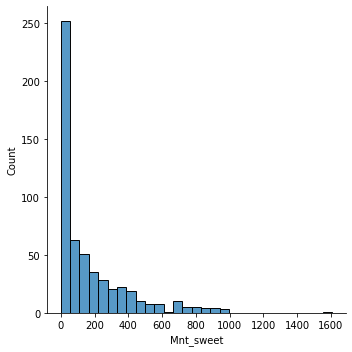

In [169]:
sns.displot(df['Mnt_sweet'])

In [170]:
df[df['Mnt_sweet']>1000]['Mnt_sweet']
indexes = df[df['Mnt_sweet']>1000]['Mnt_sweet'].index

In [171]:
df = df.drop(indexes)

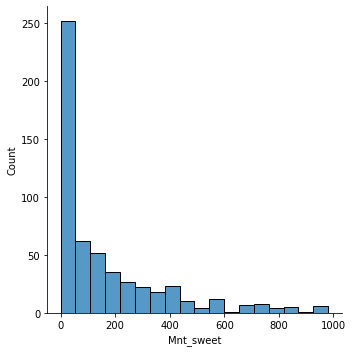

In [172]:
df['Mnt_sweet'] = df['Mnt_sweet'].apply(np.floor) #just in case cause stuff happened while working
sns.displot(df['Mnt_sweet'])

In [173]:
df[df['Mnt_sweet'].isna()]

Year_Birth   Education    Status   Income  Num_of_kids  Num_of_Teen  \
9          1979  Graduation    Single  60474.0          0.0          1.0   
30         1972    2n Cycle  Together  50334.0          0.0          1.0   
140        1973  Graduation   Married  34961.0          1.0          0.0   
180        1970    2n Cycle   Married  15315.0          0.0          0.0   
246        1975  Graduation   Married  40794.0          0.0          1.0   
544        1970  Graduation   Married  90765.0          0.0          0.0   

    Registration_date  Mnt_Fruits  Mnt_Meat  Mnt_sweet  ...  Num_Web_Visits  \
9          01/04/2013       265.0     199.0        NaN  ...            14.0   
30         24/07/2013       284.0      16.0        NaN  ...            12.0   
140        19/06/2014        45.0       2.0        NaN  ...            14.0   
180        03/08/2013         7.0       4.0        NaN  ...            10.0   
246        07/04/2013       261.0      23.0        NaN  ...            14.0   
544        24/01/2014       547.0      99.0        NaN  ...             2.0   

     Response_Campaign_1  Response_Campaign_2  Response_Campaign_3  \
9                    0.0                  0.0                  0.0   
30                   0.0                  0.0                  0.0   
140                  0.0                  0.0                  0.0   
180                  0.0                  0.0                  0.0   
246                  0.0                  0.0                  0.0   
544                  0.0                  0.0                  1.0   

     Response_Campaign_4  Response_Campaign_5  Complain  Income_min_max  \
9                    0.0                  0.0       0.0        0.552758   
30                   0.0                  0.0       0.0        0.451973   
140                  0.0                  0.0       0.0        0.299175   
180                  0.0                  0.0       0.0        0.103906   
246                  0.0                  0.0       0.0        0.357151   
544                  1.0                  0.0       0.0        0.853832   

     Status_cat  Web_Visits_Range  
9             2               1.0  
30            3               1.0  
140           1               1.0  
180           1               0.0  
246           1               1.0  
544           1               0.0  

[6 rows x 27 columns]

In [174]:
df['Mnt_sweet'] = df['Mnt_sweet'].fillna(df['Mnt_sweet'].median())
df[df['Mnt_sweet'].isna()]

Empty DataFrame
Columns: [Year_Birth, Education, Status, Income, Num_of_kids, Num_of_Teen, Registration_date, Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Wines, Mnt_Gold_Products, Mnt_Fish, Num_Web_Purchases, Num_Store_Purchases, Num_Deals_Purchases, Num_Catalog_Purchases, Num_Web_Visits, Response_Campaign_1, Response_Campaign_2, Response_Campaign_3, Response_Campaign_4, Response_Campaign_5, Complain, Income_min_max, Status_cat, Web_Visits_Range]
Index: []

[0 rows x 27 columns]

## Cleaning Num_of_Teen

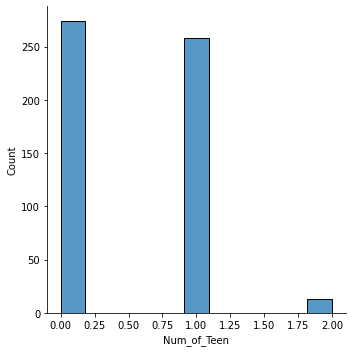

In [175]:
sns.displot(df['Num_of_Teen'])

In [176]:
df['Num_of_Teen'].value_counts()

0.0    274
1.0    258
2.0     13
Name: Num_of_Teen, dtype: int64

In [177]:
df[df['Num_of_Teen'].isna()]

Year_Birth   Education    Status        Income  Num_of_kids  Num_of_Teen  \
42         1974         NaN   Married  64959.069702          NaN          NaN   
125        1957  Graduation  Together  26091.000000          1.0          NaN   
164        1978  Graduation  Together  25851.000000          1.0          NaN   
194        1962         NaN   Married   5380.146567          NaN          NaN   
247        1982  Graduation   Married  42081.000000          1.0          NaN   
334        1961  Graduation    Single  30081.000000          0.0          NaN   
355        1959         NaN   Married  36123.061419          NaN          NaN   
369        1971         PhD   Married  42403.000000          1.0          NaN   
385        1971         NaN   Married  62135.483886          NaN          NaN   
446        1945      Master  Together  62847.000000          0.0          NaN   

    Registration_date  Mnt_Fruits  Mnt_Meat  Mnt_sweet  ...  Num_Web_Visits  \
42         29/10/2012       194.0       2.0       56.0  ...            16.0   
125        25/02/2014        15.0      10.0       19.0  ...            10.0   
164        11/02/2013         9.0       4.0       18.0  ...            14.0   
194        24/03/2013         7.0      11.0        3.0  ...            10.0   
247        26/02/2013       175.0      10.0      110.0  ...            12.0   
334        21/02/2013        36.0       0.0        2.0  ...            14.0   
355        03/04/2014      1017.0      33.0      417.0  ...            10.0   
369        11/12/2013        22.0       1.0       11.0  ...            16.0   
385        16/02/2013        32.0       0.0        8.0  ...            12.0   
446        15/01/2013       521.0     168.0      706.0  ...             4.0   

     Response_Campaign_1  Response_Campaign_2  Response_Campaign_3  \
42                   0.0                  0.0                  0.0   
125                  0.0                  0.0                  0.0   
164                  0.0                  0.0                  0.0   
194                  0.0                  0.0                  0.0   
247                  1.0                  0.0                  0.0   
334                  0.0                  0.0                  0.0   
355                  0.0                  1.0                  1.0   
369                  0.0                  0.0                  0.0   
385                  0.0                  0.0                  0.0   
446                  0.0                  0.0                  0.0   

     Response_Campaign_4  Response_Campaign_5  Complain  Income_min_max  \
42                   0.0                  0.0       0.0        0.597337   
125                  0.0                  0.0       0.0        0.211013   
164                  0.0                  0.0       0.0        0.208627   
194                  0.0                  0.0       0.0        0.005160   
247                  0.0                  0.0       0.0        0.369943   
334                  0.0                  0.0       0.0        0.250671   
355                  0.0                  0.0       0.0        0.310725   
369                  0.0                  0.0       0.0        0.373144   
385                  0.0                  0.0       0.0        0.569272   
446                  0.0                  0.0       0.0        0.576344   

     Status_cat  Web_Visits_Range  
42            1               1.0  
125           3               0.0  
164           3               1.0  
194           1               0.0  
247           1               1.0  
334           2               1.0  
355           1               0.0  
369           1               1.0  
385           1               1.0  
446           3               0.0  

[10 rows x 27 columns]

In [178]:
df.loc[[42,125,164,194,247],'Num_of_Teen'] = 0
df.loc[[334,355,369,385,446],'Num_of_Teen'] = 1

In [179]:
df[df['Num_of_Teen'].isna()]

Empty DataFrame
Columns: [Year_Birth, Education, Status, Income, Num_of_kids, Num_of_Teen, Registration_date, Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Wines, Mnt_Gold_Products, Mnt_Fish, Num_Web_Purchases, Num_Store_Purchases, Num_Deals_Purchases, Num_Catalog_Purchases, Num_Web_Visits, Response_Campaign_1, Response_Campaign_2, Response_Campaign_3, Response_Campaign_4, Response_Campaign_5, Complain, Income_min_max, Status_cat, Web_Visits_Range]
Index: []

[0 rows x 27 columns]

## Cleaning Education

In [180]:
df[df['Education'].isna()]

Year_Birth Education   Status        Income  Num_of_kids  Num_of_Teen  \
42         1974       NaN  Married  64959.069702          NaN          0.0   
194        1962       NaN  Married   5380.146567          NaN          0.0   
355        1959       NaN  Married  36123.061419          NaN          1.0   
385        1971       NaN  Married  62135.483886          NaN          1.0   

    Registration_date  Mnt_Fruits  Mnt_Meat  Mnt_sweet  ...  Num_Web_Visits  \
42         29/10/2012       194.0       2.0       56.0  ...            16.0   
194        24/03/2013         7.0      11.0        3.0  ...            10.0   
355        03/04/2014      1017.0      33.0      417.0  ...            10.0   
385        16/02/2013        32.0       0.0        8.0  ...            12.0   

     Response_Campaign_1  Response_Campaign_2  Response_Campaign_3  \
42                   0.0                  0.0                  0.0   
194                  0.0                  0.0                  0.0   
355                  0.0                  1.0                  1.0   
385                  0.0                  0.0                  0.0   

     Response_Campaign_4  Response_Campaign_5  Complain  Income_min_max  \
42                   0.0                  0.0       0.0        0.597337   
194                  0.0                  0.0       0.0        0.005160   
355                  0.0                  0.0       0.0        0.310725   
385                  0.0                  0.0       0.0        0.569272   

     Status_cat  Web_Visits_Range  
42            1               1.0  
194           1               0.0  
355           1               0.0  
385           1               1.0  

[4 rows x 27 columns]

In [181]:
df['Education'] =  df['Education'].fillna('PhD')
df[df['Education'].isna()]

Empty DataFrame
Columns: [Year_Birth, Education, Status, Income, Num_of_kids, Num_of_Teen, Registration_date, Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Wines, Mnt_Gold_Products, Mnt_Fish, Num_Web_Purchases, Num_Store_Purchases, Num_Deals_Purchases, Num_Catalog_Purchases, Num_Web_Visits, Response_Campaign_1, Response_Campaign_2, Response_Campaign_3, Response_Campaign_4, Response_Campaign_5, Complain, Income_min_max, Status_cat, Web_Visits_Range]
Index: []

[0 rows x 27 columns]

In [182]:
df['Edu_cat'] = df['Education'].astype('category').cat.codes

In [183]:
df.groupby(['Education','Edu_cat']).size()

Education   Edu_cat
2n Cycle    0           53
Basic       1            7
Graduation  2          288
Master      3           84
PhD         4          123
dtype: int64

## Cleaning Num_of_kids

0.0    337
1.0    201
2.0     13
Name: Num_of_kids, dtype: int64


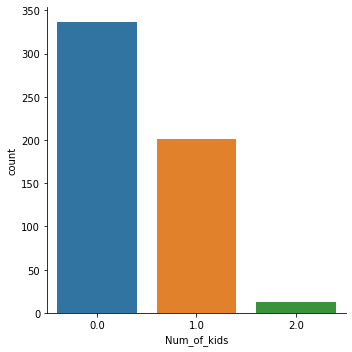

In [184]:
print(df['Num_of_kids'].value_counts())
sns.catplot(x='Num_of_kids', kind='count', data=df)

In [185]:
df[df['Num_of_kids'].isna()]

Year_Birth Education   Status        Income  Num_of_kids  Num_of_Teen  \
42         1974       PhD  Married  64959.069702          NaN          0.0   
194        1962       PhD  Married   5380.146567          NaN          0.0   
355        1959       PhD  Married  36123.061419          NaN          1.0   
385        1971       PhD  Married  62135.483886          NaN          1.0   

    Registration_date  Mnt_Fruits  Mnt_Meat  Mnt_sweet  ...  \
42         29/10/2012       194.0       2.0       56.0  ...   
194        24/03/2013         7.0      11.0        3.0  ...   
355        03/04/2014      1017.0      33.0      417.0  ...   
385        16/02/2013        32.0       0.0        8.0  ...   

     Response_Campaign_1  Response_Campaign_2  Response_Campaign_3  \
42                   0.0                  0.0                  0.0   
194                  0.0                  0.0                  0.0   
355                  0.0                  1.0                  1.0   
385                  0.0                  0.0                  0.0   

     Response_Campaign_4  Response_Campaign_5  Complain  Income_min_max  \
42                   0.0                  0.0       0.0        0.597337   
194                  0.0                  0.0       0.0        0.005160   
355                  0.0                  0.0       0.0        0.310725   
385                  0.0                  0.0       0.0        0.569272   

     Status_cat  Web_Visits_Range  Edu_cat  
42            1               1.0        4  
194           1               0.0        4  
355           1               0.0        4  
385           1               1.0        4  

[4 rows x 28 columns]

In [186]:
df['Num_of_kids'][df['Status']=='Married'].value_counts()

0.0    126
1.0     71
2.0      9
Name: Num_of_kids, dtype: int64

In [187]:
df['Num_of_kids'] = df['Num_of_kids'].fillna(0)
df[df['Num_of_kids'].isna()]

Empty DataFrame
Columns: [Year_Birth, Education, Status, Income, Num_of_kids, Num_of_Teen, Registration_date, Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Wines, Mnt_Gold_Products, Mnt_Fish, Num_Web_Purchases, Num_Store_Purchases, Num_Deals_Purchases, Num_Catalog_Purchases, Num_Web_Visits, Response_Campaign_1, Response_Campaign_2, Response_Campaign_3, Response_Campaign_4, Response_Campaign_5, Complain, Income_min_max, Status_cat, Web_Visits_Range, Edu_cat]
Index: []

[0 rows x 28 columns]

## Grouping Columns

### Age

In [188]:
df['Age'] = 2022 - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)


In [189]:
df.loc[ df['Age'] <= 30, 'Age_bin'] = 0
df.loc[(df['Age'] > 30) & (df['Age'] <= 50), 'Age_bin'] = 1
df.loc[(df['Age'] > 50) & (df['Age'] <= 70), 'Age_bin'] = 2
df.loc[ df['Age'] > 70, 'Age_bin'] = 3

In [190]:
df['Age_bin'].value_counts().sort_index()

0.0      6
1.0    230
2.0    271
3.0     48
Name: Age_bin, dtype: int64

### Mnt_Responded

In [191]:
df['Mnt_Responded'] = df['Response_Campaign_1'] + df['Response_Campaign_2'] + df['Response_Campaign_3'] + df['Response_Campaign_4'] + df['Response_Campaign_5']

In [192]:
df['Mnt_Responded'].value_counts()

0.0    441
1.0     81
2.0     19
3.0     11
4.0      3
Name: Mnt_Responded, dtype: int64

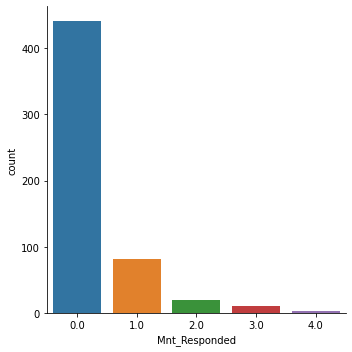

In [193]:
sns.catplot(x='Mnt_Responded', kind='count', data=df)

### Mnt_Spent

In [194]:
df['Mnt_Spent'] = df['Mnt_Fish'] + df['Mnt_Fruits'] + df['Mnt_Gold_Products'] + df['Mnt_Meat'] + df['Mnt_sweet'] + df['Mnt_Wines']

In [195]:
scaler.fit(pd.DataFrame(df['Mnt_Spent']))
df['Spent_min_max'] = scaler.transform(pd.DataFrame(df['Mnt_Spent']))
df[['Mnt_Spent','Spent_min_max']].head()

Mnt_Spent  Spent_min_max
0      684.0       0.278554
1      603.0       0.245275
2      684.0       0.278554
3     1319.0       0.539441
4      446.0       0.180772

### Num_of_Children

In [196]:
df['Num_of_Children'] = df['Num_of_kids'] + df['Num_of_Teen']

### Num_purchases in last month

In [197]:
df['Num_Purchases'] = df['Num_Web_Purchases'] + df['Num_Store_Purchases'] + df['Num_Catalog_Purchases']

In [198]:
df['Num_Purchases'].max()

29.0

In [199]:
A = df['Num_Purchases'].min()
B = df['Num_Purchases'].max()
N = 4
W = np.round((B - A)/N)
W

7.0

In [200]:
df.loc[ df['Num_Purchases'] <= W, 'Purchase_bin'] = 0
df.loc[(df['Num_Purchases'] > W) & (df['Num_Purchases'] <= 2*W), 'Purchase_bin'] = 1
df.loc[(df['Num_Purchases'] > 2*W) & (df['Num_Purchases'] <= 3*W), 'Purchase_bin'] = 2
df.loc[ df['Num_Purchases'] > 3*W, 'Purchase_bin'] = 3

In [201]:
df['Purchase_bin'].value_counts().sort_index()

0.0    152
1.0    207
2.0    161
3.0     35
Name: Purchase_bin, dtype: int64

In [202]:
indexes = df[df['Num_Deals_Purchases'] > df['Num_Purchases']]['Num_Deals_Purchases'].index
list(indexes)

[483]

In [203]:
df = df.drop(list(indexes))

In [204]:
df[df['Num_Deals_Purchases'] > df['Num_Purchases']]['Num_Deals_Purchases']

Series([], Name: Num_Deals_Purchases, dtype: float64)

### Registration date

In [205]:
df['Registration_date']

0      14/09/2012
1      19/11/2012
2      14/09/2012
3      08/11/2012
4      22/10/2013
          ...    
554    29/10/2012
555    02/11/2012
556    12/10/2013
557    17/03/2013
558    12/09/2013
Name: Registration_date, Length: 554, dtype: object

In [206]:
datedf = df['Registration_date'].str.extract('(?P<Day>\d\d/)(?P<Month>\d\d/)(?P<Year>\d\d\d\d)', expand = True)
datedf['Day'] = datedf['Day'].str.extract('(\d+)').astype(np.int64)
datedf['Month'] = datedf['Month'].str.extract('(\d+)').astype(np.int64)
datedf['Year'] = datedf['Year'].astype(np.int64)
datedf

Day  Month  Year
0     14      9  2012
1     19     11  2012
2     14      9  2012
3      8     11  2012
4     22     10  2013
..   ...    ...   ...
554   29     10  2012
555    2     11  2012
556   12     10  2013
557   17      3  2013
558   12      9  2013

[554 rows x 3 columns]

In [207]:
df['Registration_month'] = datedf['Month']
df['Registration_year'] = datedf['Year']

In [208]:
df.loc[(df['Registration_year'] == 2012) & (df['Registration_month'] <= 6), 'Registration_bin'] = 0
df.loc[(df['Registration_year'] == 2012) & (df['Registration_month'] > 6), 'Registration_bin'] = 1
df.loc[(df['Registration_year'] == 2013) & (df['Registration_month'] <= 6), 'Registration_bin'] = 2
df.loc[(df['Registration_year'] == 2013) & (df['Registration_month'] > 6), 'Registration_bin'] = 3
df.loc[(df['Registration_year'] == 2014) & (df['Registration_month'] <= 6), 'Registration_bin'] = 4
df.loc[(df['Registration_year'] == 2014) & (df['Registration_month'] > 6), 'Registration_bin'] = 5

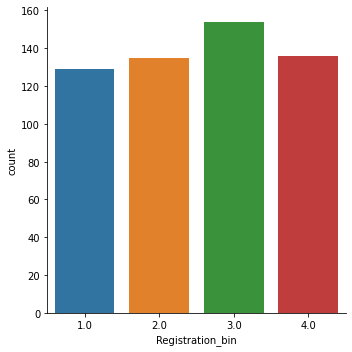

In [209]:
sns.catplot(x='Registration_bin', kind='count', data=df)

## Finishing Touch

In [210]:
df1 = df[['Complain','Income_min_max','Num_of_Children','Purchase_bin','Spent_min_max','Mnt_Responded','Web_Visits_Range','Status_cat','Edu_cat','Age_bin','Registration_bin']]
df1.head()

Complain  Income_min_max  Num_of_Children  Purchase_bin  Spent_min_max  \
0       0.0        0.492883              2.0           3.0       0.278554   
1       0.0        0.559584              3.0           3.0       0.245275   
2       0.0        0.372026              2.0           3.0       0.278554   
3       0.0        0.672786              2.0           3.0       0.539441   
4       0.0        0.503528              3.0           2.0       0.180772   

   Mnt_Responded  Web_Visits_Range  Status_cat  Edu_cat  Age_bin  \
0            0.0               1.0           3        2      2.0   
1            0.0               1.0           1        4      2.0   
2            0.0               1.0           3        2      2.0   
3            0.0               1.0           1        4      2.0   
4            1.0               1.0           2        4      2.0   

   Registration_bin  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               3.0

In [211]:
df1.columns.size

11

In [212]:
df1.columns

Index(['Complain', 'Income_min_max', 'Num_of_Children', 'Purchase_bin',
       'Spent_min_max', 'Mnt_Responded', 'Web_Visits_Range', 'Status_cat',
       'Edu_cat', 'Age_bin', 'Registration_bin'],
      dtype='object')

# Testing

In [213]:
prediction = clf_GBoost.predict(df1)

d:\Documents\University\Year_4\2nd Semester\Data mining\HW\datamine\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [214]:
df1['Response'] = prediction

C:\Users\obaro\AppData\Local\Temp\ipykernel_8632\849235152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Response'] = prediction


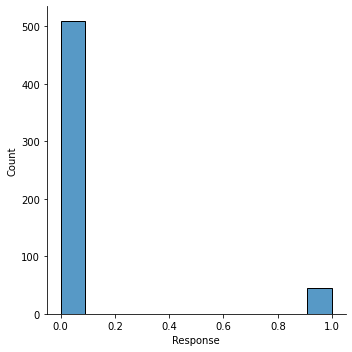

In [215]:
sns.displot(df1['Response'])

Looks fairly similar to distribution in training data which is good

In [216]:
df1.head()

Complain  Income_min_max  Num_of_Children  Purchase_bin  Spent_min_max  \
0       0.0        0.492883              2.0           3.0       0.278554   
1       0.0        0.559584              3.0           3.0       0.245275   
2       0.0        0.372026              2.0           3.0       0.278554   
3       0.0        0.672786              2.0           3.0       0.539441   
4       0.0        0.503528              3.0           2.0       0.180772   

   Mnt_Responded  Web_Visits_Range  Status_cat  Edu_cat  Age_bin  \
0            0.0               1.0           3        2      2.0   
1            0.0               1.0           1        4      2.0   
2            0.0               1.0           3        2      2.0   
3            0.0               1.0           1        4      2.0   
4            1.0               1.0           2        4      2.0   

   Registration_bin  Response  
0               1.0         0  
1               1.0         0  
2               1.0         0  
3               1.0         0  
4               3.0         0

In [217]:
df1.to_csv('Marketing_Campaign_prediction.csv')